

<h1 style="text-align: center; color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Exploratory Data Analysis (EDA) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2 ;">

<h2 style="text-align: center; color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Necessary Imports
</h2>
<hr style="border: 1px solid #4A90E2 ;">

<h3 style="color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">
    Package Descriptions
</h3>
<ul style="font-family: 'Arial', sans-serif; line-height: 1.8;">
    <li><strong>pandas</strong>: For data manipulation and analysis, making it easier to read and manipulate dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array manipulation.</li>
    <li><strong>matplotlib.pyplot</strong>: For creating basic graphs and visualizations.</li>
    <li><strong>seaborn</strong>: For more attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand the dataset's quality.</li>
</ul>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
from scipy import stats
import sys
import os

sys.path.append(os.path.abspath("../utils"))
from categorical_analysis import summarize_and_sample

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📂 Data Loading and Overview
</h2>

<hr style="border: 1px solid #4A90E2 ;">

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📥 Data Loading
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Data loading is the first step in the analysis, ensuring that the dataset is correctly imported and ready for processing. This step checks whether the data has been loaded without errors and is in the expected format.
</p>

In [2]:
path = "../data/"

data_train = pd.read_csv(path + "train_data.csv")
data_test = pd.read_csv(path + "test_data.csv")

combined_data = pd.concat([data_train, data_test], keys=['train', 'test'])

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📄 Data Overview
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The data overview provides an initial snapshot of the dataset, including the structure, size, and type of variables. This summary is essential for guiding the steps of data cleaning, transformation, and exploratory analysis.
</p>

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚂 Training Data
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing the training data is essential for understanding the characteristics that will be used in building the model. Here, we explore the structure, distribution, and integrity of the data that feeds into the learning process.
</p>

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    👀 View First Rows
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Viewing the first few rows of the dataset allows for a quick check of the structure, data types, and observation of potential initial patterns. This preview helps confirm that the data loading is correct and facilitates the planning of analysis steps.
</p>

In [3]:
combined_data.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 0    2019-12-30           31.0                              N   
      1    2019-08-30           46.0                              N   
      2    2019-12-06           40.0                              N   
      3           NaN            NaN                            NaN   
      4    2019-12-30           61.0                              N   

        Assembly Date Attorney_Representative  Average Weekly Wage  \
train 0    2020-01-01                       N                 0.00   
      1    2020-01-01                       Y              1745.93   
      2    2020-01-01                       N              1434.80   
      3    2020-01-01                     NaN                  NaN   
      4    2020-01-01                       N                  NaN   

         Birth Year    C-2 Date    C-3 Date                  Carrier Name  \
train 0      1988.0  2019-12-31         NaN    NEW HAMPSHIRE INSURANCE CO   
      1      1973.0  2020-01-01  2020-01-14  ZURICH AMERICAN INSURANCE CO   
      2      1979.0  2020-01-01         NaN     INDEMNITY INSURANCE CO OF   
      3         NaN         NaN         NaN                           NaN   
      4      1958.0  2019-12-31         NaN          STATE INSURANCE FUND   

         ... WCIO Cause of Injury Code  WCIO Cause of Injury Description  \
train 0  ...                      27.0      FROM LIQUID OR GREASE SPILLS   
      1  ...                      97.0                 REPETITIVE MOTION   
      2  ...                      79.0    OBJECT BEING LIFTED OR HANDLED   
      3  ...                       NaN                               NaN   
      4  ...                      16.0   HAND TOOL, UTENSIL; NOT POWERED   

        WCIO Nature of Injury Code WCIO Nature of Injury Description  \
train 0                       10.0                         CONTUSION   
      1                       49.0                    SPRAIN OR TEAR   
      2                        7.0                        CONCUSSION   
      3                        NaN                               NaN   
      4                       43.0                          PUNCTURE   

        WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  \
train 0                   62.0                      BUTTOCKS    13662   
      1                   38.0                   SHOULDER(S)    14569   
      2                   10.0          MULTIPLE HEAD INJURY    12589   
      3                    NaN                           NaN      NaN   
      4                   36.0                     FINGER(S)    12603   

        Agreement Reached      WCB Decision  Number of Dependents  
train 0               0.0  Not Work Related                   1.0  
      1               1.0  Not Work Related                   4.0  
      2               0.0  Not Work Related                   6.0  
      3               NaN               NaN                   NaN  
      4               0.0  Not Work Related                   1.0  

[5 rows x 33 columns]

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📐 Data Dimensions
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding the data dimensions is a key step in analysis. The number of rows and columns provides an overview of the dataset size, facilitating the planning of processing steps and model selection.
</p>

In [4]:
combined_data.shape

(981446, 33)

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📊 Data Type Analysis
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding the data types of each column is essential for selecting the appropriate preprocessing methods and ensuring accurate analysis. Here, we identify the data types present, allowing us to adjust transformation, scaling, and encoding strategies according to the characteristics of each variable.
</p>

In [5]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 981446 entries, ('train', 0) to ('test', 387974)
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       955868 non-null  object 
 1   Age at Injury                       962001 non-null  float64
 2   Alternative Dispute Resolution      962001 non-null  object 
 3   Assembly Date                       981446 non-null  object 
 4   Attorney_Representative             962001 non-null  object 
 5   Average Weekly Wage                 914146 non-null  float64
 6   Birth Year                          913453 non-null  float64
 7   C-2 Date                            938307 non-null  object 
 8   C-3 Date                            272461 non-null  object 
 9   Carrier Name                        962001 non-null  object 
 10  Carrier Type                        962001 non-null  object 
 11  Claim

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">🔍 Missing Value Analysis</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
   Checking for missing values is an essential step to ensure data integrity before analysis. Here, we identify columns with missing values and calculate their percentage, helping to understand the need for treatment, whether through imputation, removal, or other strategies.
</p>

In [6]:
((combined_data.isnull().sum() / len(combined_data)) * 100).round(2)

Accident Date                           2.61
Age at Injury                           1.98
Alternative Dispute Resolution          1.98
Assembly Date                           0.00
Attorney_Representative                 1.98
Average Weekly Wage                     6.86
Birth Year                              6.93
C-2 Date                                4.40
C-3 Date                               72.24
Carrier Name                            1.98
Carrier Type                            1.98
Claim Identifier                        0.00
Claim Injury Type                      41.51
County of Injury                        1.98
COVID-19 Indicator                      1.98
District Name                           1.98
First Hearing Date                     80.25
Gender                                  1.98
IME-4 Count                            82.88
Industry Code                           3.78
Industry Code Description               3.78
Medical Fee Region                      1.98
OIICS Natu

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    🧹 Data Cleaning
</h2>
<hr style="border: 1px solid #4A90E2;">


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔍 Missing Values
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Identifying and handling missing values is essential to maintain data quality and ensure accurate analysis. This step examines the gaps in the dataset and guides the process of filling, removing, or applying other treatment strategies.
</p>

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📅 Handling Missing Dates
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Accident Date, Assembly Date, C-2 Date, C-3 Date, First Hearing Date
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Create a binary auxiliary column (e.g., <code>missing_First Hearing Date</code>) to indicate the absence of the date.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing dates may indicate that the corresponding process or action has not yet been completed, making this information relevant for analysis.
</p>

In [7]:
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

def threating_date_missing_values(data):
    for i in date_cols:
        data[i] = pd.to_datetime(data[i], errors='coerce')
        data['missing_' + i] = data[i].isnull().astype(int)
        data[i].fillna(pd.Timestamp.now(), inplace=True)

threating_date_missing_values(data=combined_data)


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚧ Handling Missing Values in Gender
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Gender
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown" and create a binary auxiliary column (<code>missing_Gender</code>) to indicate the absence of original data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing gender data can be relevant in certain analyses; using "U" preserves data integrity, and the auxiliary column provides insight into the lack of information.
</p>

In [8]:
combined_data['Gender'].fillna('U', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Handling of Age at Injury
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Age at Injury
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median age.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Age can influence the type of injury. Filling in missing values with the median avoids distortion from outliers, maintaining data representativity.
</p>

In [9]:
combined_data['Age at Injury'].fillna(data_train['Age at Injury'].median(), inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    💵 Handling of Average Weekly Wage
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Average Weekly Wage
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median of the average weekly wage.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Salary distribution is often skewed. The median is more robust against outliers and provides a better representation of the central tendency.
</p>

In [10]:
combined_data['Average Weekly Wage'].fillna(data_train['Average Weekly Wage'].median(), inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📝 Handling Indicator Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Alternative Dispute Resolution, Attorney_Representative, Gender, COVID-19 Indicator
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "No" or the most frequent category, if the variable is not binary.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Variables indicating the presence of representation, arbitration, or COVID can be interpreted as "No" when missing, as they suggest the absence of these characteristics or events.
</p>

In [11]:
variables_binaries_cols = ['Alternative Dispute Resolution', 'Attorney_Representative', 'COVID-19 Indicator']
def variables_binaries_missing_values(data):
    for i in variables_binaries_cols:
        data[i].fillna('Não', inplace=True)

variables_binaries_missing_values(data=combined_data)
combined_data['Gender'].fillna('Desconhecido', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🗺️ Handling Names and Locations
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Carrier Name, District Name, County of Injury
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Names of insurers, districts, and counties are informative. The value "Unknown" prevents data loss and indicates the absence of information, allowing for a comprehensive analysis.
</p>

In [12]:
variables_desc_cols = ['Carrier Name', 'District Name', 'County of Injury']
def variables_desc_missing_values(data):
    for i in variables_desc_cols:
        data[i].fillna('Desconhecido', inplace=True)

variables_desc_missing_values(data=combined_data)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📑 Handling IME-4 Form Count
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> IME-4 Count
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with 0, assuming that the absence indicates no IME-4 forms submitted.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Replacing missing values with 0 prevents incorrect interpretations and is a simple solution, as the absence likely indicates no form submission.
</p>

In [13]:
combined_data['IME-4 Count'].fillna(0, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Handling Industry Categories
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Industry Code, Industry Code Description
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with the category "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Creating an "Unknown" category for missing values prevents data loss and ensures the integrity of the analysis, allowing cases with missing industry information to be included.
</p>

In [14]:
industry_cols = ['Industry Code', 'Industry Code Description']
for i in industry_cols:
    combined_data[i].fillna('Desconhecido', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏥 Handling Medical Fee Region
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Medical Fee Region
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with the most frequent category.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The medical fee region is relevant information. Replacing missing values with the most frequent category preserves the integrity of the data without introducing arbitrary values.
</p>

In [15]:
combined_data['Medical Fee Region'].fillna(data_train['Medical Fee Region'].mode()[0], inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Handling Injury Codes (WCIO)
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> WCIO Cause of Injury, WCIO Nature of Injury, WCIO Part Of Body
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These injury codes are likely important for the analysis. The absence of data can be marked as "Unknown" without negatively affecting the model's performance.
</p>

In [16]:
wcio_cols = ['WCIO Cause of Injury', 'WCIO Nature of Injury', 'WCIO Part Of Body']
for i in wcio_cols:
    combined_data[i + ' Code'].fillna(99, inplace=True)
    combined_data[i + ' Description'].fillna("Desconhecido", inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📍 Handling Zip Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Zip Code
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with "Unknown" or with the mode.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> While the zip code may not be essential for the model, keeping it—either as "Unknown" or with the mode—helps maintain the geographical context of the data.
</p>

In [17]:
combined_data['Zip Code'].fillna('Desconhecido', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Handling Agreement Reached
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Agreement Reached
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with "No".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Many cases may not have reached an agreement without the involvement of the WCB. Using "No" as a default value is a safe assumption that prevents incorrect interpretations.
</p>

In [18]:
combined_data['Agreement Reached'].fillna('Não', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Tratamento de Acordos Fechados
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Coluna:</strong> Agreement Reached
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Ação:</strong> Preencher valores ausentes com "Não".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justificativa:</strong> Muitos casos podem não ter chegado a um acordo sem a participação da WCB. Usar "Não" como valor padrão é uma suposição segura que evita interpretações incorretas.
</p>


In [19]:
combined_data['WCB Decision'].fillna("Indeterminado", inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    👪 Handling Number of Dependents
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Number of Dependents
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with 0.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Assuming that missing values indicate the absence of dependents is a reasonable simplification that facilitates data handling.
</p>

In [20]:
combined_data['Number of Dependents'].fillna(0, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Handling Birth Year
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Birth Year
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The median is resistant to outliers and provides an appropriate central value for filling missing values, especially useful in skewed distributions.
</p>

In [21]:
combined_data['Birth Year'].fillna(data_train['Birth Year'].median(), inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🗑️ Removal of OIICS Nature of Injury Description Column
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> OIICS Nature of Injury Description
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Remove the column from the dataset.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The column is entirely composed of missing values, making its presence in the dataset irrelevant for analysis.
</p>

In [22]:
combined_data.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Handling and Treatment of Missing Values in the Training Dataset
</h2>

In [23]:
data_train = combined_data.loc['train'].reset_index(drop=True)
data_test = combined_data.loc['test'].reset_index(drop=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Handling Injury Type in the Compensation Claim
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Claim Injury Type
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Remove rows with missing values, as 5% of the instances in the <code>data_train</code> dataset are incomplete for this target variable.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> This approach is straightforward and effective, removing instances without a defined target and allowing the model to focus on complete data for better performance.
</p>

In [24]:
data_train = data_train.dropna(subset=['Claim Injury Type'])

In [25]:
combined_data = pd.concat([data_train, data_test], keys=['train', 'test'])

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Handling Duplicate Values
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Identify and remove duplicate values from the dataset to prevent the model from being influenced by redundant data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Duplicate rows can introduce bias and distort the analysis results. Removing duplicates helps ensure the accuracy of the model by using only unique and representative data.
</p>

In [26]:
data_train.duplicated().sum()

0

<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Conclusion:</strong> The check for duplicates in the <code>data_train</code> dataset resulted in a value of <strong>0</strong> duplicate rows, indicating that there are no repeated rows in the dataset. This implies that:
</p>
<ul style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>No Action Needed:</strong> Since there are no duplicates, no action is required to remove duplicate rows.</li>
    <li><strong>Data Quality:</strong> The absence of duplicates suggests that the data is well-structured and organized, with no redundancies that compromise the integrity of the information.</li>
</ul>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Based on this, we can proceed to other data preparation steps, such as handling missing values and transformations, without the need for additional adjustments regarding duplicates.
</p>

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Data Type Conversion
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert data types as needed to optimize memory and ensure accuracy in analysis. This includes transforming numerical variables to categories and converting dates to the <code>datetime</code> format.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Data type conversion helps reduce memory usage and ensures that data is handled in the appropriate format, making processing and analysis easier.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion from float64 to float32
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert numerical variables from <code>float64</code> to <code>float32</code> to optimize memory usage without losing significant precision.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Reducing <code>float64</code> to <code>float32</code> decreases memory consumption, making processing more efficient, especially in large datasets, while maintaining adequate precision for most analyses.
</p>

In [27]:
float_cols = ['Age at Injury', 'Average Weekly Wage', 'Birth Year',
              'IME-4 Count', 'WCIO Cause of Injury Code',
              'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
              'Number of Dependents']

for col in float_cols:
    combined_data[col] = combined_data[col].astype('float32')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion from int64 to int32
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert integer variables from <code>int64</code> to <code>int32</code> to reduce memory consumption while keeping values within the allowed range for <code>int32</code>.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Converting from <code>int64</code> to <code>int32</code> reduces memory usage, making processing more efficient, which is especially useful in large datasets, without affecting data integrity in most cases.
</p>

In [28]:
combined_data['Claim Identifier'] = combined_data['Claim Identifier'].astype('int32')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion of Object Type Columns to Category
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert columns with <code>object</code> type to <code>category</code>, especially those with repeated values, to reduce memory usage and optimize processing.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> <code>Category</code> type columns are more memory-efficient for categorical data as they store repeated values as references. This conversion is particularly useful in large datasets, maintaining the same information with improved performance.
</p>

In [29]:
object_cols = ['Alternative Dispute Resolution', 'Attorney_Representative',
               'Carrier Name', 'Carrier Type', 'Claim Injury Type',
               'County of Injury', 'COVID-19 Indicator', 'District Name',
               'Gender', 'Industry Code', 'Industry Code Description',
               'Medical Fee Region', 'WCIO Cause of Injury Description',
               'WCIO Nature of Injury Description', 'WCIO Part Of Body Description',
               'Zip Code', 'Agreement Reached', 'WCB Decision']

for col in object_cols:
    combined_data[col] = combined_data[col].astype('category')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion of Missing Value Indicator Columns to int8
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert binary columns indicating missing values to the <code>int8</code> type, saving memory space without losing information.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing value indicator columns contain only 0 or 1, and the <code>int8</code> type is sufficient to store these values. This conversion optimizes memory usage, especially in large datasets with multiple binary indicator columns.
</p>

In [30]:
missing_cols = ['missing_Accident Date', 'missing_Assembly Date',
                'missing_C-2 Date', 'missing_C-3 Date',
                'missing_First Hearing Date']
for col in missing_cols:
    combined_data[col] = combined_data[col].astype('int8')

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Descriptive Statistics
</h2>
<hr style="border: 1px solid #4A90E2;">

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Descriptive Statistics for Numerical Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section provides a statistical summary of the numerical variables, including measures such as mean, median, standard deviation, and minimum and maximum values. These statistics help to understand the distribution and variability of the numerical data.
</p>

In [31]:
combined_data.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Claim Identifier,First Hearing Date,IME-4 Count,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date
count,962001,962001.000000,962001,9.620010e+05,962001.000000,962001,962001,9.620010e+05,962001,962001.000000,962001.000000,962001.000000,962001.000000,962001.000000,962001.000000,962001.0,962001.000000,962001.000000,962001.000000
mean,2022-03-25 14:01:32.679214080,41.832226,2022-06-03 01:28:55.778237696,3.486890e+02,1886.960571,2022-06-21 05:13:29.541456384,2024-02-26 12:37:38.225261824,6.013242e+06,2024-06-11 02:31:14.630230272,0.520380,55.176086,41.558315,38.144356,3.004028,0.006375,0.0,0.024630,0.716777,0.798518
min,1961-09-06 00:00:00,0.000000,2020-01-01 00:00:00,0.000000e+00,0.000000,1985-10-22 00:00:00,1985-10-28 00:00:00,5.393066e+06,2020-01-30 00:00:00,0.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2021-03-26 00:00:00,30.000000,2021-05-06 00:00:00,0.000000e+00,1966.000000,2021-05-25 00:00:00,2023-11-28 00:00:00,5.716379e+06,2024-11-28 16:07:52.811215872,0.000000,31.000000,16.000000,31.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000
50%,2022-06-16 00:00:00,41.000000,2022-07-18 00:00:00,0.000000e+00,1977.000000,2022-08-11 00:00:00,2024-11-28 16:07:52.492037888,6.039324e+06,2024-11-28 16:07:52.811215872,0.000000,57.000000,49.000000,38.000000,3.000000,0.000000,0.0,0.000000,1.000000,1.000000
75%,2023-06-27 00:00:00,53.000000,2023-07-18 00:00:00,4.314400e+02,1990.000000,2023-08-11 00:00:00,2024-11-28 16:07:52.492037888,6.313328e+06,2024-11-28 16:07:52.811215872,0.000000,75.000000,52.000000,53.000000,5.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,2024-11-28 16:07:51.921942,117.000000,2024-06-05 00:00:00,2.828079e+06,2019.000000,2024-11-28 16:07:52.325919,2024-11-28 16:07:52.492038,6.554041e+06,2024-11-28 16:07:52.811216,73.000000,99.000000,99.000000,99.000000,6.000000,1.000000,0.0,1.000000,1.000000,1.000000
std,NaN,14.359681,NaN,5.087646e+03,416.645538,NaN,NaN,3.402501e+05,NaN,1.581075,26.667446,23.511236,25.010811,1.999666,0.079590,0.0,0.154995,0.450564,0.401108


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Descriptive Statistics for Categorical Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section provides a summary of the categorical variables, including the frequency and proportion of each category. These statistics are useful for understanding the distribution of categorical data and identifying patterns or imbalances in the classes.
</p>

In [32]:
categorical_cols = combined_data.select_dtypes(include='category').columns.to_list()

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Alternative Dispute Resolution (ADR)
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Alternative Dispute Resolution (ADR)</code> variable indicates whether an alternative mechanism, such as mediation or arbitration, was used to resolve the dispute.
</p>

In [ ]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[0])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Alternative Dispute Resolution (ADR)</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [34]:
value_counts_df.head()

,Alternative Dispute Resolution,Counts,Percentage
0,N,957726,99.555614
1,Y,4269,0.443763
2,U,6,0.000624


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Alternative Dispute Resolution (ADR)</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [35]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  227327    2023-10-11           59.0                              N   
      286235    2024-01-11           31.0                              N   
train 86381     2020-06-09           38.0                              N   
      316714    2021-09-01           46.0                              N   
      411339    2022-02-15           54.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  227327    2023-10-27                       Y             0.000000   
      286235    2024-01-22                       N             0.000000   
train 86381     2020-06-26                       N             0.000000   
      316714    2021-09-02                       N           762.750000   
      411339    2022-02-21                       Y          2140.459961   

              Birth Year   C-2 Date                   C-3 Date  \
test  227327      1964.0 2023-11-07 2023-12-14 00:00:00.000000   
      286235      1977.0 2024-01-22 2024-11-28 16:07:52.492038   
train 86381       1982.0 2020-06-26 2024-11-28 16:07:52.492038   
      316714      1974.0 2021-09-02 2024-11-28 16:07:52.492038   
      411339      1967.0 2022-02-19 2022-03-04 00:00:00.000000   

                               Carrier Name  ...  \
test  227327           STATE INSURANCE FUND  ...   
      286235        CHARTER OAK FIRE INS CO  ...   
train 86381   PROPERTY & CASUALTY INSURANCE  ...   
      316714           STATE INSURANCE FUND  ...   
      411339        LIBERTY INSURANCE CORP.  ...   

             WCIO Part Of Body Description      Zip Code Agreement Reached  \
test  227327       ABDOMEN INCLUDING GROIN         12601               Não   
      286235                          FOOT         13350               Não   
train 86381                      FINGER(S)         11795               0.0   
      316714    MULTIPLE LOWER EXTREMITIES         10459               0.0   
      411339               LOWER BACK AREA  Desconhecido               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
test  227327     Indeterminado                  6.0                     0   
      286235     Indeterminado                  5.0                     0   
train 86381   Not Work Related                  3.0                     0   
      316714  Not Work Related                  1.0                     0   
      411339  Not Work Related                  2.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
test  227327                     0                0                 0   
      286235                     0                0                 1   
train 86381                      0                0                 1   
      316714                     0                0                 1   
      411339                     0                0                 0   

             missing_First Hearing Date  
test  227327                          1  
      286235                          1  
train 86381                           1  
      316714                          1  
      411339                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Attorney Representative
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Attorney Representative</code> variable indicates whether the claimant had legal representation during the process, which can affect the outcome of the case.
</p>

In [36]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[1])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Attorney Representative</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [37]:
value_counts_df.head()

,Attorney_Representative,Counts,Percentage
0,N,698767,72.636827
1,Y,263234,27.363173


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Attorney Representative</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [38]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  140303    2023-07-03           55.0                              N   
      222036    2023-10-11           21.0                              N   
train 276074    2021-06-22           60.0                              N   
test  43096     2023-02-10           61.0                              N   
      179988    2021-10-14           50.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  140303    2023-07-07                       N                  0.0   
      222036    2023-10-23                       N                  0.0   
train 276074    2021-06-23                       N                  0.0   
test  43096     2023-02-28                       N                  0.0   
      179988    2023-08-29                       Y                  0.0   

              Birth Year   C-2 Date                   C-3 Date  \
test  140303      1967.0 2023-07-07 2024-11-28 16:07:52.492038   
      222036      2001.0 2023-10-23 2024-11-28 16:07:52.492038   
train 276074      1961.0 2021-06-23 2024-11-28 16:07:52.492038   
test  43096       1961.0 2023-02-28 2024-11-28 16:07:52.492038   
      179988      1971.0 2023-10-23 2024-11-28 16:07:52.492038   

                             Carrier Name  ... WCIO Part Of Body Description  \
test  140303         STATE INSURANCE FUND  ...       ABDOMEN INCLUDING GROIN   
      222036  TECHNOLOGY INSURANCE CO INC  ...                          HAND   
train 276074         STATE INSURANCE FUND  ...                          KNEE   
test  43096     AMTRUST INSURANCE COMPANY  ...                     FINGER(S)   
      179988      HEREFORD INS. CO. ILDBF  ...                      MULTIPLE   

                  Zip Code Agreement Reached      WCB Decision  \
test  140303         13619               Não     Indeterminado   
      222036         14105               Não     Indeterminado   
train 276074  Desconhecido               0.0  Not Work Related   
test  43096   Desconhecido               Não     Indeterminado   
      179988         11237               Não     Indeterminado   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
test  140303                  4.0                     0                     0   
      222036                  3.0                     0                     0   
train 276074                  3.0                     0                     0   
test  43096                   0.0                     0                     0   
      179988                  1.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
test  140303                0                 1                          1  
      222036                0                 1                          1  
train 276074                0                 1                          1  
test  43096                 0                 1                          1  
      179988                0                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚚 Carrier Name
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Carrier Name</code> variable represents the name of the insurer responsible for the compensation process. This information can be important for understanding specific patterns of insurers in the process.
</p>

In [39]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[2])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each insurer in the <code>Carrier Name</code> variable, indicating the frequency with which each name appears in the dataset.
</p>

In [40]:
value_counts_df.head()

,Carrier Name,Counts,Percentage
0,STATE INSURANCE FUND,177333,18.433765
1,AMERICAN ZURICH INSURANCE CO,31025,3.225049
2,"POLICE, FIRE, SANITATION",30762,3.197710
3,CHARTER OAK FIRE INS CO,29037,3.018396
4,INDEMNITY INS. OF N AMERICA,27229,2.830454


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Carrier Name</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [41]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 376089    2021-12-14           58.0                              N   
test  296464    2024-01-23           61.0                              N   
      134978    2023-06-25           23.0                              N   
      115040    2023-05-18           27.0                              N   
train 536119    2021-04-01           39.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 376089    2021-12-17                       N             0.000000   
test  296464    2024-02-02                       Y             0.000000   
      134978    2023-06-29                       N           763.030029   
      115040    2023-06-05                       N             0.000000   
train 536119    2022-09-21                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 376089      1963.0 2021-12-17 2024-11-28 16:07:52.492038   
test  296464      1962.0 2024-02-02 2024-02-21 00:00:00.000000   
      134978      2000.0 2023-06-29 2024-11-28 16:07:52.492038   
      115040      1995.0 2023-06-05 2024-11-28 16:07:52.492038   
train 536119      1981.0 2022-09-20 2024-11-28 16:07:52.492038   

                                Carrier Name  ...  \
train 376089      NEW HAMPSHIRE INSURANCE CO  ...   
test  296464  GREAT AMERICAN ALLIANCE INS CO  ...   
      134978  HARTFORD INS CO OF THE MIDWEST  ...   
      115040         CHARTER OAK FIRE INS CO  ...   
train 536119        POLICE, FIRE, SANITATION  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 376089                          KNEE     14034               0.0   
test  296464                          KNEE     13757               Não   
      134978                         SKULL     10605               Não   
      115040                         ANKLE     11768               Não   
train 536119                      MULTIPLE     11710               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 376089  Not Work Related                  4.0                     0   
test  296464     Indeterminado                  2.0                     0   
      134978     Indeterminado                  5.0                     0   
      115040     Indeterminado                  0.0                     0   
train 536119  Not Work Related                  6.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 376089                     0                0                 1   
test  296464                     0                0                 0   
      134978                     0                0                 1   
      115040                     0                0                 1   
train 536119                     0                0                 1   

             missing_First Hearing Date  
train 376089                          1  
test  296464                          1  
      134978                          1  
      115040                          1  
train 536119                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚚 Carrier Type
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Carrier Type</code> variable indicates the type of insurer associated with the case, potentially providing insights into compensation patterns across different types of insurers.
</p>

In [42]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[3])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each type in the <code>Carrier Type</code> variable, indicating the frequency with which each type appears in the dataset.
</p>

In [43]:
value_counts_df.head()

,Carrier Type,Counts,Percentage
0,1A. PRIVATE,487195,50.643918
1,3A. SELF PUBLIC,200868,20.880228
2,2A. SIF,177333,18.433765
3,4A. SELF PRIVATE,91407,9.501757
4,UNKNOWN,3416,0.355093


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Carrier Type</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [44]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  197312    2023-09-15           36.0                              N   
      143370    2023-07-07           42.0                              N   
train 590196    2022-12-13           56.0                              N   
test  202457    2023-09-25           46.0                              N   
train 258195    2021-05-11           37.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  197312    2023-09-21                       N             0.000000   
      143370    2023-07-12                       Y           569.820007   
train 590196    2022-12-23                       N          3744.899902   
test  202457    2023-09-27                       Y             0.000000   
train 258195    2021-05-21                       Y             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
test  197312      1987.0 2023-09-20 2024-11-28 16:07:52.492038   
      143370      1980.0 2023-07-17 2023-07-10 00:00:00.000000   
train 590196      1966.0 2022-12-23 2023-01-03 00:00:00.000000   
test  202457      1977.0 2023-09-27 2024-11-28 16:07:52.492038   
train 258195      1983.0 2021-05-21 2021-05-20 00:00:00.000000   

                            Carrier Name  ... WCIO Part Of Body Description  \
test  197312        STATE INSURANCE FUND  ...                          HAND   
      143370    REPUBLIC FRANKLIN INS CO  ...                     FINGER(S)   
train 590196        STATE INSURANCE FUND  ...                         THUMB   
test  202457  NORGUARD INSURANCE COMPANY  ...                   SOFT TISSUE   
train 258195       NYC TRANSIT AUTHORITY  ...                   SHOULDER(S)   

                  Zip Code Agreement Reached      WCB Decision  \
test  197312  Desconhecido               Não     Indeterminado   
      143370         11231               Não     Indeterminado   
train 590196         11746               0.0  Not Work Related   
test  202457         14513               Não     Indeterminado   
train 258195         11370               0.0  Not Work Related   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
test  197312                  0.0                     0                     0   
      143370                  0.0                     0                     0   
train 590196                  1.0                     0                     0   
test  202457                  5.0                     0                     0   
train 258195                  1.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
test  197312                0                 1                          1  
      143370                0                 0                          0  
train 590196                0                 0                          1  
test  202457                0                 1                          1  
train 258195                0                 0                          0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    💼 Claim Injury Type
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Claim Injury Type</code> variable represents the type of injury reported in the claim. This attribute is essential for understanding the nature of compensation requests and can influence the decision-making process.
</p>

In [45]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[4])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each injury type in the <code>Claim Injury Type</code> variable, indicating the frequency with which each injury type appears in the dataset.
</p>

In [46]:
value_counts_df.head(8)

,Claim Injury Type,Counts,Percentage
0,2. NON-COMP,291078,50.708156
1,4. TEMPORARY,148507,25.871128
2,3. MED ONLY,68906,12.003986
3,5. PPD SCH LOSS,48280,8.410769
4,1. CANCELLED,12477,2.173595
5,6. PPD NSL,4211,0.733590
6,8. DEATH,470,0.081878
7,7. PTD,97,0.016898


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Claim Injury Type</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [47]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  338136    2024-02-27           36.0                              N   
      49866     2023-03-01           57.0                              N   
      370343    2024-04-23           57.0                              N   
train 84358     2020-02-12           61.0                              N   
test  267972    2023-12-13           38.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  338136    2024-03-28                       Y                  0.0   
      49866     2023-03-08                       N                  0.0   
      370343    2024-05-10                       N                  0.0   
train 84358     2020-06-23                       N                  0.0   
test  267972    2023-12-22                       N                  0.0   

              Birth Year   C-2 Date                   C-3 Date  \
test  338136      1987.0 2024-03-28 2024-04-10 00:00:00.000000   
      49866       1965.0 2023-03-08 2024-11-28 16:07:52.492038   
      370343      1966.0 2024-05-10 2024-11-28 16:07:52.492038   
train 84358       1958.0 2020-06-23 2024-11-28 16:07:52.492038   
test  267972      1977.0 2023-12-22 2024-11-28 16:07:52.492038   

                             Carrier Name  ...  \
test  338136  HIGHVIEW NATIONAL INSURANCE  ...   
      49866       BANKERS STANDARD INS CO  ...   
      370343  PUBLIC EMPLOYERS RISK MGMT.  ...   
train 84358           SYRACUSE UNIVERSITY  ...   
test  267972        NYU LANGONE HOSPITALS  ...   

                                  WCIO Part Of Body Description  Zip Code  \
test  338136  INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...     10522   
      49866                                               ELBOW     14467   
      370343                                             EYE(S)     14304   
train 84358                                           LOWER ARM     13090   
test  267972             BODY SYSTEMS AND MULTIPLE BODY SYSTEMS     10304   

             Agreement Reached      WCB Decision Number of Dependents  \
test  338136               Não     Indeterminado                  6.0   
      49866                Não     Indeterminado                  5.0   
      370343               Não     Indeterminado                  3.0   
train 84358                0.0  Not Work Related                  3.0   
test  267972               Não     Indeterminado                  5.0   

             missing_Accident Date missing_Assembly Date missing_C-2 Date  \
test  338136                     0                     0                0   
      49866                      0                     0                0   
      370343                     0                     0                0   
train 84358                      0                     0                0   
test  267972                     0                     0                0   

              missing_C-3 Date missing_First Hearing Date  
test  338136                 0                          1  
      49866                  1                          1  
      370343                 1                          1  
train 84358                  1                          1  
test  267972                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🌍 County of Injury
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>County of Injury</code> variable represents the county where the injury occurred, providing geographical context that can be useful for analyzing regional accident trends.
</p>

In [48]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[5])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each county in the <code>County of Injury</code> variable, indicating the frequency with which each county appears in the dataset.
</p>

In [49]:
value_counts_df.head()

,County of Injury,Counts,Percentage
0,QUEENS,98691,10.258929
1,SUFFOLK,97094,10.092921
2,KINGS,89124,9.264439
3,NASSAU,71186,7.399784
4,BRONX,67666,7.033880


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>County of Injury</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [50]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  93529     2023-04-10           62.0                              N   
train 488241    2022-04-14           66.0                              N   
test  223870    2023-10-19           71.0                              N   
train 199035    2021-01-30           37.0                              N   
      138751    2020-09-26           36.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  93529     2023-05-04                       N             0.000000   
train 488241    2022-06-30                       N           720.049988   
test  223870    2023-10-24                       N             0.000000   
train 199035    2021-02-05                       Y           661.309998   
      138751    2020-10-07                       Y             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
test  93529       1960.0 2023-05-04 2024-11-28 16:07:52.492038   
train 488241      1977.0 2022-06-30 2024-11-28 16:07:52.492038   
test  223870      1952.0 2023-10-24 2024-11-28 16:07:52.492038   
train 199035         0.0 2021-02-05 2021-03-25 00:00:00.000000   
      138751      1984.0 2020-10-07 2020-10-07 00:00:00.000000   

                         Carrier Name  ... WCIO Part Of Body Description  \
test  93529   A I U INSURANCE COMPANY  ...            NO PHYSICAL INJURY   
train 488241     STATE INSURANCE FUND  ...               LOWER BACK AREA   
test  223870     STATE INSURANCE FUND  ...                         WRIST   
train 199035     XL INSURANCE AMERICA  ...               LOWER BACK AREA   
      138751  CHARTER OAK FIRE INS CO  ...               LOWER BACK AREA   

              Zip Code Agreement Reached      WCB Decision  \
test  93529      11710               Não     Indeterminado   
train 488241     11722               0.0  Not Work Related   
test  223870     13211               Não     Indeterminado   
train 199035     03458               0.0  Not Work Related   
      138751     12477               0.0  Not Work Related   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
test  93529                   0.0                     0                     0   
train 488241                  4.0                     0                     0   
test  223870                  5.0                     0                     0   
train 199035                  3.0                     0                     0   
      138751                  3.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
test  93529                 0                 1                          1  
train 488241                0                 1                          1  
test  223870                0                 1                          1  
train 199035                0                 0                          0  
      138751                0                 0                          0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🦠 COVID-19 Indicator
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>COVID-19 Indicator</code> variable signals whether the compensation case is related to COVID-19. This variable is relevant for identifying how the pandemic has impacted the types and volumes of compensation claims.
</p>

In [51]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[6])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>COVID-19 Indicator</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [52]:
value_counts_df.head()

,COVID-19 Indicator,Counts,Percentage
0,N,931939,96.875055
1,Y,30062,3.124945


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>COVID-19 Indicator</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [53]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  154155    2023-07-17           65.0                              N   
      166705    2023-07-25           39.0                              N   
      156991    2023-07-24           49.0                              N   
train 289767    2021-07-02           23.0                              N   
test  185960    2023-08-24           35.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  154155    2023-07-26                       N                  0.0   
      166705    2023-08-10                       N                  0.0   
      156991    2023-07-28                       N                  0.0   
train 289767    2021-07-19                       N                  0.0   
test  185960    2023-09-07                       N                  0.0   

              Birth Year   C-2 Date                   C-3 Date  \
test  154155      1958.0 2023-07-26 2024-11-28 16:07:52.492038   
      166705      1984.0 2023-08-10 2024-11-28 16:07:52.492038   
      156991      1974.0 2023-07-28 2024-11-28 16:07:52.492038   
train 289767      1998.0 2021-07-19 2024-11-28 16:07:52.492038   
test  185960      1988.0 2023-09-07 2024-11-28 16:07:52.492038   

                                Carrier Name  ...  \
test  154155        NY MUNICIPAL WC ALLIANCE  ...   
      166705    AMERICAN ZURICH INSURANCE CO  ...   
      156991   PROPERTY & CASUALTY INSURANCE  ...   
train 289767  SECURITY NATIONAL INSURANCE CO  ...   
test  185960        NY MUNICIPAL WC ALLIANCE  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
test  154155                         SKULL     11024               Não   
      166705                      MULTIPLE     11706               Não   
      156991                     FINGER(S)     10598               Não   
train 289767          MULTIPLE HEAD INJURY     11720               0.0   
test  185960                      MULTIPLE     11754               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
test  154155     Indeterminado                  4.0                     0   
      166705     Indeterminado                  2.0                     0   
      156991     Indeterminado                  1.0                     0   
train 289767  Not Work Related                  3.0                     0   
test  185960     Indeterminado                  6.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
test  154155                     0                0                 1   
      166705                     0                0                 1   
      156991                     0                0                 1   
train 289767                     0                0                 1   
test  185960                     0                0                 1   

             missing_First Hearing Date  
test  154155                          1  
      166705                          1  
      156991                          1  
train 289767                          1  
test  185960                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏢 District Name
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>District Name</code> variable indicates the district responsible for processing the case, which may influence the outcome based on regional factors.
</p>

In [54]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[7])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each district in the <code>District Name</code> variable, indicating the frequency with which each district appears in the dataset.
</p>

In [55]:
value_counts_df.head()

,District Name,Counts,Percentage
0,NYC,458751,47.687165
1,ALBANY,142671,14.830650
2,HAUPPAUGE,97192,10.103108
3,BUFFALO,77086,8.013089
4,SYRACUSE,74183,7.711323


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>District Name</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [56]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 48999     2020-03-18           31.0                              N   
      353843    2021-09-21           42.0                              N   
test  375690    2024-05-15           58.0                              N   
train 424783    2022-03-07           43.0                              N   
      567548    2022-10-13           60.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 48999     2020-03-24                       N             0.000000   
      353843    2021-11-05                       N             0.000000   
test  375690    2024-05-20                       N             0.000000   
train 424783    2022-03-15                       N          2088.530029   
      567548    2022-11-11                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 48999       1988.0 2020-03-24 2020-04-29 00:00:00.000000   
      353843      1979.0 2021-11-04 2024-11-28 16:07:52.492038   
test  375690      1966.0 2024-05-20 2024-11-28 16:07:52.492038   
train 424783      1978.0 2022-03-15 2022-03-25 00:00:00.000000   
      567548      1962.0 2022-11-11 2024-11-28 16:07:52.492038   

                             Carrier Name  ... WCIO Part Of Body Description  \
train 48999   PENNSYLVANIA MANUFACTURERS'  ...                     FINGER(S)   
      353843      HEALTH & HOSPITAL CORP.  ...               LOWER BACK AREA   
test  375690         STATE INSURANCE FUND  ...                        EYE(S)   
train 424783         STATE INSURANCE FUND  ...                          KNEE   
      567548    PHOENIX INSURANCE COMPANY  ...                      MULTIPLE   

              Zip Code Agreement Reached      WCB Decision  \
train 48999      14020               0.0  Not Work Related   
      353843     11003               0.0  Not Work Related   
test  375690     14011               Não     Indeterminado   
train 424783     12524               0.0  Not Work Related   
      567548     10940               0.0  Not Work Related   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
train 48999                   3.0                     0                     0   
      353843                  1.0                     0                     0   
test  375690                  0.0                     0                     0   
train 424783                  1.0                     0                     0   
      567548                  1.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
train 48999                 0                 0                          1  
      353843                0                 1                          1  
test  375690                0                 1                          1  
train 424783                0                 0                          1  
      567548                0                 1                          0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚧ Gender
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Gender</code> variable indicates the claimant's gender. This information may be relevant for analyses seeking to identify gender patterns in compensation cases.
</p>

In [57]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[8])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Gender</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [58]:
value_counts_df.head()

,Gender,Counts,Percentage
0,M,550561,57.230814
1,F,401070,41.691225
2,U,10051,1.044801
3,X,319,0.033160


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Gender</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [59]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 568767    2022-11-10           33.0                              N   
      34138     2020-02-20           39.0                              N   
test  300191    2023-11-09           44.0                              N   
      231066    2023-10-18           42.0                              N   
      142988    2023-06-29           50.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 568767    2022-11-15                       N             0.000000   
      34138     2020-02-26                       Y           690.299988   
test  300191    2024-02-07                       Y             0.000000   
      231066    2023-11-02                       Y             0.000000   
      142988    2023-07-12                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 568767      1989.0 2022-11-15 2024-11-28 16:07:52.492038   
      34138       1980.0 2020-02-26 2020-03-16 00:00:00.000000   
test  300191      1979.0 2024-02-20 2024-11-28 16:07:52.492038   
      231066      1981.0 2023-11-02 2024-02-21 00:00:00.000000   
      142988      1973.0 2023-07-12 2024-11-28 16:07:52.492038   

                               Carrier Name  ...  \
train 568767           STATE INSURANCE FUND  ...   
      34138    ARCH INDEMNITY INSURANCE CO.  ...   
test  300191  NEW YORK BLACK CAR OPERATORS'  ...   
      231066  TRAVELERS PROPERTY & CASUALTY  ...   
      142988           STATE INSURANCE FUND  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 568767                     LOWER ARM     11236               0.0   
      34138                           KNEE     11706               0.0   
test  300191                      MULTIPLE     10452               Não   
      231066               LOWER BACK AREA     10941               Não   
      142988                         WRIST     12920               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 568767  Not Work Related                  6.0                     0   
      34138   Not Work Related                  0.0                     0   
test  300191     Indeterminado                  6.0                     0   
      231066     Indeterminado                  3.0                     0   
      142988     Indeterminado                  4.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 568767                     0                0                 1   
      34138                      0                0                 0   
test  300191                     0                0                 1   
      231066                     0                0                 0   
      142988                     0                0                 1   

             missing_First Hearing Date  
train 568767                          1  
      34138                           0  
test  300191                          0  
      231066                          0  
      142988                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Industry Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Industry Code</code> variable represents the code of the industry associated with the claimant, providing context about the economic sector in which they operate. This can be relevant for identifying accident patterns in specific sectors.
</p>

In [60]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[9])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each industry code in the <code>Industry Code</code> variable, indicating the frequency with which each sector appears in the dataset.
</p>

In [61]:
value_counts_df.head()

,Industry Code,Counts,Percentage
0,62.0,186546,19.391456
1,92.0,145032,15.076076
2,61.0,83950,8.726602
3,44.0,71496,7.432009
4,48.0,62200,6.465690


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Industry Code</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [62]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  140764    2023-07-05           31.0                              N   
train 67207     2020-05-05           60.0                              N   
test  152987    2023-07-13           31.0                              N   
      92271     2023-04-29           27.0                              N   
train 299772    2021-07-30           30.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  140764    2023-07-10                       N                  0.0   
train 67207     2020-05-13                       N                  0.0   
test  152987    2023-07-25                       N                  0.0   
      92271     2023-05-03                       N                  0.0   
train 299772    2021-08-04                       N                  0.0   

              Birth Year   C-2 Date                   C-3 Date  \
test  140764      1992.0 2023-07-10 2024-11-28 16:07:52.492038   
train 67207       1960.0 2020-05-13 2024-11-28 16:07:52.492038   
test  152987      1992.0 2023-07-25 2024-11-28 16:07:52.492038   
      92271       1995.0 2023-05-03 2024-11-28 16:07:52.492038   
train 299772      1991.0 2021-08-04 2024-11-28 16:07:52.492038   

                               Carrier Name  ...  \
test  140764  EVEREST PREMIER INSURANCE CO.  ...   
train 67207      ACE AMERICAN INSURANCE CO.  ...   
test  152987         XL SPECIALTY INSURANCE  ...   
      92271     INDEMNITY INS. OF N AMERICA  ...   
train 299772     ACE AMERICAN INSURANCE CO.  ...   

             WCIO Part Of Body Description      Zip Code Agreement Reached  \
test  140764                         THUMB  Desconhecido               Não   
train 67207                          THUMB         12061               0.0   
test  152987                      MULTIPLE         11101               Não   
      92271                           KNEE         10451               Não   
train 299772          MULTIPLE HEAD INJURY         13440               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
test  140764     Indeterminado                  0.0                     0   
train 67207   Not Work Related                  4.0                     0   
test  152987     Indeterminado                  5.0                     0   
      92271      Indeterminado                  3.0                     0   
train 299772  Not Work Related                  4.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
test  140764                     0                0                 1   
train 67207                      0                0                 1   
test  152987                     0                0                 1   
      92271                      0                0                 1   
train 299772                     0                0                 1   

             missing_First Hearing Date  
test  140764                          1  
train 67207                           1  
test  152987                          1  
      92271                           1  
train 299772                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Industry Code Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Industry Code Description</code> variable provides a textual description of the industry sector, complementing the industry code with more detailed information about the claimant's type of economic activity.
</p>

In [63]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[10])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each sector description in the <code>Industry Code Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [64]:
value_counts_df.head()

,Industry Code Description,Counts,Percentage
0,HEALTH CARE AND SOCIAL ASSISTANCE,186546,19.391456
1,PUBLIC ADMINISTRATION,145032,15.076076
2,RETAIL TRADE,103766,10.786475
3,TRANSPORTATION AND WAREHOUSING,87101,9.054149
4,EDUCATIONAL SERVICES,83950,8.726602


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Industry Code Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [65]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 273327    2021-05-17           28.0                              N   
test  139033    2023-06-03           60.0                              N   
train 71939     2020-03-10           42.0                              N   
      574104    2022-10-26           39.0                              N   
      57641     2020-04-01           65.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 273327    2021-06-17                       N             0.000000   
test  139033    2023-07-06                       N             0.000000   
train 71939     2020-05-25                       N          2062.080078   
      574104    2022-11-23                       N             0.000000   
      57641     2020-04-20                       Y           820.799988   

              Birth Year                   C-2 Date  \
train 273327      1993.0 2021-06-16 00:00:00.000000   
test  139033      1962.0 2024-11-28 16:07:52.325919   
train 71939       1977.0 2020-05-25 00:00:00.000000   
      574104      1983.0 2022-11-23 00:00:00.000000   
      57641       1954.0 2020-04-20 00:00:00.000000   

                               C-3 Date                   Carrier Name  ...  \
train 273327 2024-11-28 16:07:52.492038  STARR SPECIALTY INSURANCE CO.  ...   
test  139033 2023-06-21 00:00:00.000000   *** CARRIER UNDETERMINED ***  ...   
train 71939  2024-11-28 16:07:52.492038           STATE INSURANCE FUND  ...   
      574104 2024-11-28 16:07:52.492038           STATE INSURANCE FUND  ...   
      57641  2020-06-29 00:00:00.000000   AMERICAN ZURICH INSURANCE CO  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 273327                          HAND   10035.0               0.0   
test  139033                  Desconhecido     13210               Não   
train 71939                          LUNGS     10950               0.0   
      574104               LOWER BACK AREA     10039               0.0   
      57641                LOWER BACK AREA     11764               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 273327  Not Work Related                  4.0                     0   
test  139033     Indeterminado                  5.0                     0   
train 71939   Not Work Related                  2.0                     0   
      574104  Not Work Related                  4.0                     0   
      57641   Not Work Related                  0.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 273327                     0                0                 1   
test  139033                     0                1                 0   
train 71939                      0                0                 1   
      574104                     0                0                 1   
      57641                      0                0                 0   

             missing_First Hearing Date  
train 273327                          1  
test  139033                          1  
train 71939                           1  
      574104                          1  
      57641                           0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏥 Medical Fee Region
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Medical Fee Region</code> variable indicates the geographic region that defines the applicable medical fees for the case, which may influence the cost and processing of the compensation claim.
</p>

In [66]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[11])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each region in the <code>Medical Fee Region</code> variable, indicating the frequency with which each region appears in the dataset.
</p>

In [67]:
value_counts_df.head()

,Medical Fee Region,Counts,Percentage
0,IV,448257,46.596313
1,I,227185,23.615880
2,II,143776,14.945515
3,III,88333,9.182215
4,UK,54450,5.660077


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Medical Fee Region</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [68]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 94695     2020-07-07           62.0                              N   
      267124    2021-06-02           56.0                              N   
      40110     2020-02-27           29.0                              N   
      554429    2022-10-14           39.0                              N   
      330692    2020-11-03           64.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 94695     2020-07-14                       Y                  0.0   
      267124    2021-06-08                       N                  0.0   
      40110     2020-03-06                       Y               2352.0   
      554429    2022-10-20                       N                  0.0   
      330692    2021-09-28                       N                  0.0   

              Birth Year   C-2 Date                   C-3 Date  \
train 94695       1958.0 2020-07-14 2020-07-16 00:00:00.000000   
      267124      1964.0 2021-06-08 2024-11-28 16:07:52.492038   
      40110       1990.0 2020-03-05 2020-03-24 00:00:00.000000   
      554429      1983.0 2022-10-20 2024-11-28 16:07:52.492038   
      330692      1956.0 2021-09-27 2024-11-28 16:07:52.492038   

                               Carrier Name  ...  \
train 94695                NEW YORK COLLEGE  ...   
      267124  ERIE COUNTY MEDICAL CTR CORP.  ...   
      40110      ACE AMERICAN INSURANCE CO.  ...   
      554429        SENTRY CASUALTY COMPANY  ...   
      330692    INDEMNITY INS. OF N AMERICA  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 94695                    SHOULDER(S)     11233               0.0   
      267124                     LOWER ARM   14220.0               0.0   
      40110                    SHOULDER(S)     11235               0.0   
      554429                   SHOULDER(S)     13901               0.0   
      330692                          KNEE     10930               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 94695   Not Work Related                  4.0                     0   
      267124  Not Work Related                  6.0                     0   
      40110   Not Work Related                  2.0                     0   
      554429  Not Work Related                  2.0                     0   
      330692  Not Work Related                  0.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 94695                      0                0                 0   
      267124                     0                0                 1   
      40110                      0                0                 0   
      554429                     0                0                 1   
      330692                     0                0                 1   

             missing_First Hearing Date  
train 94695                           1  
      267124                          1  
      40110                           0  
      554429                          1  
      330692                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 WCIO Cause of Injury Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Cause of Injury Description</code> variable provides a textual description of the cause of the injury. This information can be useful for identifying accident patterns and their most frequent causes.
</p>

In [69]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[12])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each cause description in the <code>WCIO Cause of Injury Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [70]:
value_counts_df.head()

,WCIO Cause of Injury Description,Counts,Percentage
0,LIFTING,74630,7.757788
1,"FELLOW WORKER, PATIENT OR OTHER PERSON",70446,7.322861
2,"STRAIN OR INJURY BY, NOC",55336,5.752177
3,"FALL, SLIP OR TRIP, NOC",53856,5.598331
4,ON SAME LEVEL,49812,5.177957


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Cause of Injury Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [71]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  209595    2023-10-02           25.0                              N   
train 434483    2022-03-16           39.0                              N   
test  159501    2023-07-30           43.0                              N   
train 400521    2022-01-27           39.0                              N   
      336078    2021-09-30           52.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  209595    2023-10-05                       N             0.000000   
train 434483    2022-04-01                       Y          1418.060059   
test  159501    2023-08-02                       N             0.000000   
train 400521    2022-02-03                       Y             0.000000   
      336078    2021-10-06                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
test  209595      1997.0 2023-10-05 2024-11-28 16:07:52.492038   
train 434483      1982.0 2022-03-29 2022-04-20 00:00:00.000000   
test  159501         0.0 2023-08-02 2024-11-28 16:07:52.492038   
train 400521      1982.0 2022-02-03 2022-02-25 00:00:00.000000   
      336078      1969.0 2021-10-06 2024-11-28 16:07:52.492038   

                              Carrier Name  ... WCIO Part Of Body Description  \
test  209595     WAL-MART ASSOCIATES, INC.  ...               LOWER BACK AREA   
train 434483  CNY OTHER THAN ED, HED WATER  ...                      MULTIPLE   
test  159501   INDEMNITY INS. OF N AMERICA  ...                          FOOT   
train 400521              COUNTY OF NASSAU  ...                      MULTIPLE   
      336078   LONG BEACH CITY SCHOOL DIST  ...               LOWER BACK AREA   

              Zip Code Agreement Reached      WCB Decision  \
test  209595     12550               Não     Indeterminado   
train 434483     10314               0.0  Not Work Related   
test  159501     12469               Não     Indeterminado   
train 400521     11793               0.0  Not Work Related   
      336078     11561               0.0  Not Work Related   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
test  209595                  0.0                     0                     0   
train 434483                  5.0                     0                     0   
test  159501                  6.0                     0                     0   
train 400521                  2.0                     0                     0   
      336078                  2.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
test  209595                0                 1                          1  
train 434483                0                 0                          0  
test  159501                0                 1                          1  
train 400521                0                 0                          1  
      336078                0                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩺 WCIO Nature of Injury Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Nature of Injury Description</code> variable provides a textual description of the nature of the injury. This can help identify the most common types of injuries among cases, offering insights into the physical impact of accidents.
</p>

In [ ]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[13])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each injury nature description in the <code>WCIO Nature of Injury Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [73]:
value_counts_df.head()

,WCIO Nature of Injury Description,Counts,Percentage
0,STRAIN OR TEAR,261699,27.203610
1,CONTUSION,193102,20.072952
2,SPRAIN OR TEAR,89572,9.311009
3,LACERATION,84471,8.780760
4,"ALL OTHER SPECIFIC INJURIES, NOC",60999,6.340846


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Nature of Injury Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [74]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  290076    2024-01-22           27.0                              N   
train 49030     2020-03-20           28.0                              N   
      223528    2021-03-16           31.0                              N   
      317184    2021-08-28           23.0                              N   
      382531    2021-12-27           52.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  290076    2024-01-25                       N              0.00000   
train 49030     2020-03-24                       Y            631.02002   
      223528    2021-03-19                       N              0.00000   
      317184    2021-09-03                       N              0.00000   
      382531    2021-12-31                       N              0.00000   

              Birth Year   C-2 Date                   C-3 Date  \
test  290076      1996.0 2024-01-29 2024-01-23 00:00:00.000000   
train 49030          0.0 2020-03-24 2020-03-26 00:00:00.000000   
      223528      1990.0 2021-03-19 2021-03-30 00:00:00.000000   
      317184      1998.0 2021-09-02 2024-11-28 16:07:52.492038   
      382531      1969.0 2021-12-30 2024-11-28 16:07:52.492038   

                               Carrier Name  ...  \
test  290076           STATE INSURANCE FUND  ...   
train 49030         A I U INSURANCE COMPANY  ...   
      223528  HARTFORD ACCIDENT & INDEMNITY  ...   
      317184     NEW HAMPSHIRE INSURANCE CO  ...   
      382531              LM INSURANCE CORP  ...   

                       WCIO Part Of Body Description      Zip Code  \
test  290076                               FINGER(S)         13090   
train 49030                          LOWER BACK AREA         76082   
      223528                                    FOOT         11378   
      317184                             SHOULDER(S)         14220   
      382531  BODY SYSTEMS AND MULTIPLE BODY SYSTEMS  Desconhecido   

             Agreement Reached      WCB Decision Number of Dependents  \
test  290076               Não     Indeterminado                  6.0   
train 49030                0.0  Not Work Related                  0.0   
      223528               0.0  Not Work Related                  6.0   
      317184               0.0  Not Work Related                  4.0   
      382531               0.0  Not Work Related                  1.0   

             missing_Accident Date missing_Assembly Date missing_C-2 Date  \
test  290076                     0                     0                0   
train 49030                      0                     0                0   
      223528                     0                     0                0   
      317184                     0                     0                0   
      382531                     0                     0                0   

              missing_C-3 Date missing_First Hearing Date  
test  290076                 0                          1  
train 49030                  0                          0  
      223528                 0                          1  
      317184                 1                          1  
      382531                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🦵 WCIO Part Of Body Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Part Of Body Description</code> variable provides a textual description of the body part affected by the injury. This detail is useful for identifying the body areas most commonly affected in workplace accidents.
</p>

In [75]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[14])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each body part description in the <code>WCIO Part Of Body Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [76]:
value_counts_df.head()

,WCIO Part Of Body Description,Counts,Percentage
0,MULTIPLE,109476,11.380030
1,LOWER BACK AREA,81763,8.499264
2,KNEE,76933,7.997185
3,FINGER(S),63033,6.552280
4,SHOULDER(S),60038,6.240950


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Part Of Body Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [77]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 439535    2022-04-01           57.0                              N   
      364613    2021-11-20           55.0                              N   
      426906    2022-03-11           47.0                              N   
      354749    2021-09-19           33.0                              N   
test  175747    2023-05-03           57.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 439535    2022-04-08                       N                  0.0   
      364613    2021-11-25                       N                  0.0   
      426906    2022-03-18                       N                  0.0   
      354749    2021-11-08                       Y                  0.0   
test  175747    2023-08-23                       Y                  0.0   

              Birth Year   C-2 Date                   C-3 Date  \
train 439535         0.0 2022-04-07 2024-11-28 16:07:52.492038   
      364613      1966.0 2021-11-25 2024-11-28 16:07:52.492038   
      426906      1974.0 2022-03-18 2024-11-28 16:07:52.492038   
      354749      1988.0 2021-11-08 2021-11-05 00:00:00.000000   
test  175747      1965.0 2023-09-13 2023-08-21 00:00:00.000000   

                               Carrier Name  ...  \
train 439535          NYU LANGONE HOSPITALS  ...   
      364613      INDEMNITY INSURANCE CO OF  ...   
      426906    ARCH INDEMNITY INSURANCE CO  ...   
      354749  NEW YORK BLACK CAR OPERATORS'  ...   
test  175747      MANHATTAN & BRONX SURFACE  ...   

                    WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 439535                                 HAND     07901               0.0   
      364613                                 KNEE     11235               0.0   
      426906                          SOFT TISSUE     11735               0.0   
      354749  MULTIPLE BODY PARTS (INCLUDING BODY     10466               0.0   
test  175747                                 FOOT     07055               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 439535  Not Work Related                  5.0                     0   
      364613  Not Work Related                  3.0                     0   
      426906  Not Work Related                  6.0                     0   
      354749  Not Work Related                  5.0                     0   
test  175747     Indeterminado                  6.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 439535                     0                0                 1   
      364613                     0                0                 1   
      426906                     0                0                 1   
      354749                     0                0                 0   
test  175747                     0                0                 0   

             missing_First Hearing Date  
train 439535                          1  
      364613                          1  
      426906                          1  
      354749                          0  
test  175747                          0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📍 Zip Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Zip Code</code> variable represents the postal code associated with the location of the incident. This information can be useful for identifying regional patterns of accidents.
</p>

In [78]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[15])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each postal code in the <code>Zip Code</code> variable, indicating the frequency with which each code appears in the dataset.
</p>

In [79]:
value_counts_df.head()

,Zip Code,Counts,Percentage
0,Desconhecido,47979,4.987417
1,11236,5358,0.556964
2,10940,4804,0.499376
3,11368,4621,0.480353
4,11717,4537,0.471621


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Zip Code</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [80]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 67619     2020-03-26           53.0                              N   
      582899    2022-12-02           39.0                              N   
test  63301     2023-03-21           32.0                              N   
      156445    2023-07-26           69.0                              N   
train 164378    2020-11-11           41.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 67619     2020-05-13                       N          1820.150024   
      582899    2022-12-12                       Y           826.030029   
test  63301     2023-03-24                       Y             0.000000   
      156445    2023-07-28                       N             0.000000   
train 164378    2020-11-25                       Y           521.960022   

              Birth Year   C-2 Date                   C-3 Date  \
train 67619       1967.0 2020-07-27 2020-05-07 00:00:00.000000   
      582899      1983.0 2022-12-11 2024-11-28 16:07:52.492038   
test  63301       1990.0 2023-03-24 2023-04-06 00:00:00.000000   
      156445      1953.0 2023-07-28 2024-11-28 16:07:52.492038   
train 164378      1979.0 2020-12-07 2020-11-20 00:00:00.000000   

                               Carrier Name  ...  \
train 67619            STATE INSURANCE FUND  ...   
      582899          PROPERTY AND CASUALTY  ...   
test  63301            STATE INSURANCE FUND  ...   
      156445           STATE INSURANCE FUND  ...   
train 164378  NEW YORK BLACK CAR OPERATORS'  ...   

                    WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 67619                                 LUNGS     10573               0.0   
      582899                                 HAND     12553               0.0   
test  63301                           SHOULDER(S)     13440               Não   
      156445                      INTERNAL ORGANS     10940               Não   
train 164378  MULTIPLE BODY PARTS (INCLUDING BODY     11220               1.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 67619   Not Work Related                  3.0                     0   
      582899  Not Work Related                  6.0                     0   
test  63301      Indeterminado                  1.0                     0   
      156445     Indeterminado                  5.0                     0   
train 164378  Not Work Related                  5.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 67619                      0                0                 0   
      582899                     0                0                 1   
test  63301                      0                0                 0   
      156445                     0                0                 1   
train 164378                     0                0                 0   

             missing_First Hearing Date  
train 67619                           0  
      582899                          1  
test  63301                           1  
      156445                          1  
train 164378                          0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Agreement Reached
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Agreement Reached</code> variable indicates whether an agreement was reached in the case. This attribute may be relevant for understanding the outcome and resolution of compensation cases.
</p>

In [81]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[16])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Agreement Reached</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [82]:
value_counts_df.head()

,Agreement Reached,Counts,Percentage
0,0.0,547239,56.885492
1,Não,387975,40.330000
2,1.0,26787,2.784509


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Agreement Reached</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [83]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 587170    2022-12-15           59.0                              N   
      118492    2020-08-18           59.0                              N   
test  166708    2023-08-03           17.0                              N   
      63973     2022-11-10           86.0                              N   
train 388692    2022-01-06           38.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 587170    2022-12-19                       N                  0.0   
      118492    2020-08-28                       N                  0.0   
test  166708    2023-08-10                       N                  0.0   
      63973     2023-03-27                       N                  0.0   
train 388692    2022-01-12                       N                  0.0   

              Birth Year   C-2 Date                   C-3 Date  \
train 587170      1963.0 2022-12-19 2023-01-10 00:00:00.000000   
      118492      1961.0 2020-08-28 2024-11-28 16:07:52.492038   
test  166708      2005.0 2023-08-21 2023-08-08 00:00:00.000000   
      63973       1936.0 2023-03-27 2024-11-28 16:07:52.492038   
train 388692      1983.0 2022-01-11 2024-11-28 16:07:52.492038   

                               Carrier Name  ...  \
train 587170     VIGILANT INSURANCE COMPANY  ...   
      118492      FEDERAL INSURANCE COMPANY  ...   
test  166708                   ARDSLEY UFSD  ...   
      63973   NATIONAL INTERSTATE INSURANCE  ...   
train 388692              LM INSURANCE CORP  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 587170                         CHEST     11731               0.0   
      118492                     FINGER(S)     11783               0.0   
test  166708                         SKULL     10530               Não   
      63973                          CHEST     12449               Não   
train 388692                         ELBOW     14020               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 587170  Not Work Related                  0.0                     0   
      118492  Not Work Related                  2.0                     0   
test  166708     Indeterminado                  6.0                     0   
      63973      Indeterminado                  0.0                     0   
train 388692  Not Work Related                  6.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 587170                     0                0                 0   
      118492                     0                0                 1   
test  166708                     0                0                 0   
      63973                      0                0                 1   
train 388692                     0                0                 1   

             missing_First Hearing Date  
train 587170                          1  
      118492                          1  
test  166708                          1  
      63973                           1  
train 388692                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📝 WCB Decision
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCB Decision</code> variable indicates the decision of the Workers' Compensation Board (WCB) regarding the case. This information can be essential for understanding the outcome of compensation claims.
</p>

In [84]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[17])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>WCB Decision</code> variable, indicating the frequency with which each decision appears in the dataset.
</p>

In [85]:
value_counts_df.head()

,WCB Decision,Counts,Percentage
0,Not Work Related,574026,59.67
1,Indeterminado,387975,40.33




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCB Decision</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [86]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 23100     2020-02-06           60.0                              N   
      176248    2020-11-24           62.0                              N   
test  220330    2001-09-11           41.0                              Y   
train 28581     2020-02-11           53.0                              N   
test  678       2022-09-28           37.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 23100     2020-02-07                       N                  0.0   
      176248    2020-12-22                       Y                450.0   
test  220330    2023-10-19                       N                  0.0   
train 28581     2020-02-17                       N                  0.0   
test  678       2023-01-03                       N                  0.0   

              Birth Year                   C-2 Date  \
train 23100       1959.0 2020-02-07 00:00:00.000000   
      176248      1958.0 2020-12-22 00:00:00.000000   
test  220330      1977.0 2024-11-28 16:07:52.325919   
train 28581       1966.0 2020-02-17 00:00:00.000000   
test  678         1985.0 2023-01-03 00:00:00.000000   

                               C-3 Date                  Carrier Name  ...  \
train 23100  2024-11-28 16:07:52.492038         NYC TRANSIT AUTHORITY  ...   
      176248 2021-01-25 00:00:00.000000  AMERICAN ZURICH INSURANCE CO  ...   
test  220330 2024-11-28 16:07:52.492038          ELECTRICAL EMPLOYERS  ...   
train 28581  2024-11-28 16:07:52.492038          STATE INSURANCE FUND  ...   
test  678    2024-11-28 16:07:52.492038          STATE INSURANCE FUND  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 23100                    SOFT TISSUE     10475               0.0   
      176248                         WRIST     11368               0.0   
test  220330                  Desconhecido     07076               Não   
train 28581                          CHEST     10032               0.0   
test  678                            ANKLE     10075               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 23100   Not Work Related                  2.0                     0   
      176248  Not Work Related                  4.0                     0   
test  220330     Indeterminado                  4.0                     0   
train 28581   Not Work Related                  1.0                     0   
test  678        Indeterminado                  5.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 23100                      0                0                 1   
      176248                     0                0                 0   
test  220330                     0                1                 1   
train 28581                      0                0                 1   
test  678                        0                0                 1   

             missing_First Hearing Date  
train 23100                           1  
      176248                          0  
test  220330                          1  
train 28581                           1  
test  678                             1  

[5 rows x 37 columns]


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-align: center; text-shadow: 2px 2px #D1D1D1;">
    🔧 Feature Engineering
</h2>
<hr style="border: 1px solid #4A90E2;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Feature Engineering</strong> stage is essential for creating new variables or modifying existing ones to maximize the predictive power of machine learning models. In this phase, we explore transformations, variable combinations, and the creation of new features to improve model performance.
</p>



<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 2px 2px #D1D1D1;">
    ⏱️ Process Time
</h2>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Process Time</code> variables measures the time between the accident date and specific events, such as the claim creation date or the first hearing date. It is useful for understanding the urgency and complexity of cases.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Calculate the difference in days between the <code>Accident Date</code> and other relevant dates, such as the <code>Assembly Date</code> or <code>First Hearing Date</code>.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A longer time to the first action may indicate a less urgent injury, while faster processes may be associated with more serious injuries. This variable helps capture the nature and priority of the cases.
</p>


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">
    📅 Accident Date ➔ Assembly Date
</h2>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the claim creation date (<code>Assembly Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter time to claim creation may indicate that the injury was significant enough to require a prompt response. On the other hand, a longer time may suggest that the injury was not perceived as urgent or that there was a delay in starting the process, which could impact the assessment of the case's severity.
</p>

In [87]:
combined_data['Time To Assembly'] = (combined_data['Assembly Date'] - combined_data['Accident Date']).dt.days


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ First Hearing Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date of the first hearing (<code>First Hearing Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter period until the first hearing may indicate a more serious case, possibly involving injuries that require prompt resolution. In contrast, a longer period may be associated with less urgent cases or more complex disputes that took longer to reach a hearing. This delay may also indicate that the case was not initially contested or that there were difficulties in the approval process.
</p>

In [88]:
combined_data['Time To First Hearing'] = (combined_data['First Hearing Date'] - combined_data['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ C-2 Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date the employer's report was received (<code>C-2 Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A short time between the accident and the receipt of the employer's form may indicate that the incident was quickly recognized and documented, suggesting it was noticeable or severe. In contrast, a longer time may indicate a delay by the employer in reporting the injury, which could affect the perception of the injury's severity or responsibility.
</p>

In [89]:
combined_data['Time to C-2 Date'] = (combined_data['C-2 Date'] - combined_data['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ C-3 Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date the employee's form was received (<code>C-3 Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter time between the accident and form submission may indicate that the affected person sought to formalize the process quickly, possibly due to the severity of the injury. In contrast, a longer time may suggest a less severe injury or, in some cases, hesitation or difficulties for the employee in reporting the injury.
</p>

In [90]:
combined_data['Time to C-3 Date'] = (combined_data['C-3 Date'] - combined_data['Accident Date']).dt.days


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Age Group
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Group age into categories or ranges (<em>young</em>, <em>middle-aged</em>, <em>elderly</em>) based on the <code>Age at Injury</code> column.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Certain age groups may be more prone to specific types of injuries, which can help identify risk patterns and segment the analysis by age.
</p>

In [91]:
combined_data['Age Group'] = pd.cut(combined_data['Age at Injury'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Mid-age', 'Senior', 'Elderly'])



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Specific Injury Type (based on WCIO Codes)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a binary or ordinal feature that combines the nature, cause, and body part codes of the injury (<code>WCIO Nature of Injury Code</code>, <code>WCIO Cause of Injury Code</code>, <code>WCIO Part Of Body Code</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A combination of nature, cause, and body part can capture the specific type of injury, which is highly relevant to the <code>Claim Injury Type</code>, helping to refine the analysis and identify injury patterns more precisely.
</p>

In [92]:
combined_data['Injury Type Combined'] = combined_data['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                    combined_data['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                    combined_data['WCIO Part Of Body Code'].astype(str)



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Arbitration and Representation History
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a feature that combines <code>Alternative Dispute Resolution</code> and <code>Attorney_Representative</code> to indicate if the claim involved alternative resolution and legal representation.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Claims that undergo arbitration or have legal representation may involve specific types of injuries or present higher complexity, which can influence analysis and outcome prediction.
</p>

In [93]:
combined_data['Dispute_and_Rep'] = combined_data['Alternative Dispute Resolution'].astype(str) + "_" + \
                                combined_data['Attorney_Representative'].astype(str)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Injury-Targeted Industry
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a new feature categorizing the industry into risk sectors (<em>high</em>, <em>medium</em>, <em>low</em>) based on the <code>Industry Code Description</code> column.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Sectors with higher accident risks may be associated with specific types of injuries, helping to identify injury patterns according to the industry sector and facilitating risk analysis.
</p>

In [94]:
risk_map = {
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'High',
    'TRANSPORTATION AND WAREHOUSING': 'High',
    'CONSTRUCTION': 'High',
    'MANUFACTURING': 'High',
    'ACCOMMODATION AND FOOD SERVICES': 'High',
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'High',
    'MINING': 'High',

    'RETAIL TRADE': 'Medium',
    'EDUCATIONAL SERVICES': 'Medium',
    'PUBLIC ADMINISTRATION': 'Medium',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION': 'Medium',
    'WHOLESALE TRADE': 'Medium',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Medium',
    'UTILITIES': 'Medium',

    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Low',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Low',
    'INFORMATION': 'Low',
    'REAL ESTATE AND RENTAL AND LEASING': 'Low',
    'FINANCE AND INSURANCE': 'Low',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Low'
}

combined_data['Industry Risk'] = combined_data['Industry Code Description'].map(risk_map).fillna('Medium')




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💵 Number of Dependents and Normalized Weekly Wage
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Normalize the weekly wage (<code>Average Weekly Wage</code>) by the number of dependents to create a feature that represents the relative economic impact of the injury.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The financial impact of an injury can vary significantly based on the number of dependents, making this a relevant metric to understand the economic burden of the injury on the employee.
</p>

In [95]:
combined_data['Economic Impact'] = combined_data['Average Weekly Wage'] / (combined_data['Number of Dependents'] + 1)



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⚙️ Process Complexity Indicator
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Sum the binary variables to create a complexity indicator. For example: presence of an attorney, arbitration, and hearing.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A higher number of interventions may indicate that the injury or case is more complex, helping to differentiate simple processes from cases that require greater attention and analysis.
</p>

In [96]:
combined_data['Process Complexity'] = (
    (combined_data['Attorney_Representative'] == 'Sim').astype(int) +
    (combined_data['Alternative Dispute Resolution'] == 'Sim').astype(int) +
    (combined_data['First Hearing Date'].notnull()).astype(int) +
    (1 - combined_data['missing_Accident Date']) +
    (1 - combined_data['missing_Assembly Date']) +
    (1 - combined_data['missing_C-2 Date']) +
    (1 - combined_data['missing_C-3 Date']) +
    (1 - combined_data['missing_First Hearing Date'])
)




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🌦️ Seasonal Indicator for Accident
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a column that indicates the season in which the accident occurred based on the <code>Accident Date</code>.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Certain types of injuries may be more common in specific seasons, such as outdoor work accidents in winter. This indicator can help identify seasonal patterns in accidents.
</p>

In [97]:
combined_data['Accident Season'] = combined_data['Accident Date'].dt.month % 12 // 3 + 1
combined_data['Accident Season'] = combined_data['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🦠 COVID-19 Specific Indicator
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a feature that combines the <code>COVID-19 Indicator</code> with the <code>Industry Code Description</code> to differentiate industries that were more affected by the pandemic.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The pandemic impacted sectors differently, and this combination can capture specific effects, helping to understand how the COVID-19 context affected certain types of injuries and industries.
</p>

In [98]:
combined_data['COVID and Industry'] = combined_data['COVID-19 Indicator'].astype(str) + "_" + combined_data['Industry Code Description'].astype(str)

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Transformações Matemáticas
</h3>

In [99]:
combined_data['Log Average Weekly Wage'] = np.log1p(combined_data['Average Weekly Wage'])
combined_data['Average Weekly Wage Squared'] = combined_data['Average Weekly Wage'] ** 2
combined_data['Average Weekly Wage Sqrt'] = np.sqrt(combined_data['Average Weekly Wage'])

In [100]:
combined_data['Log IME-4 Count'] = np.log1p(combined_data['IME-4 Count'])
combined_data['IME-4 Count Squared'] = combined_data['IME-4 Count'] ** 2
combined_data['IME-4 Count Sqrt'] = np.sqrt(combined_data['IME-4 Count'])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Interações com outras variáveis
</h3>

In [101]:
combined_data['Wage * Economic Impact'] = combined_data['Average Weekly Wage'] * combined_data['Economic Impact']
combined_data['IME-4 / Economic Impact'] = combined_data['IME-4 Count'] / (combined_data['Economic Impact'] + 1e-6)


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Data Visualization
</h2>
<hr style="border: 1px solid #4A90E2; width: 100%; margin: 20px auto;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Data visualizations are essential for identifying patterns, trends, and hidden insights in the dataset. Here, we explore different charts and visual representations to better understand the variables and their relationships.
</p>

In [102]:
data_train = combined_data.loc['train'].reset_index(drop=True)
data_test = combined_data.loc['test'].reset_index(drop=True)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📈 Target Variable Distribution (Claim Injury Type)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Start by observing the class distribution in the target variable <code>Claim Injury Type</code>. This helps identify potential class imbalances, which is essential to determine if data balancing techniques will be necessary before training the model.
</p>

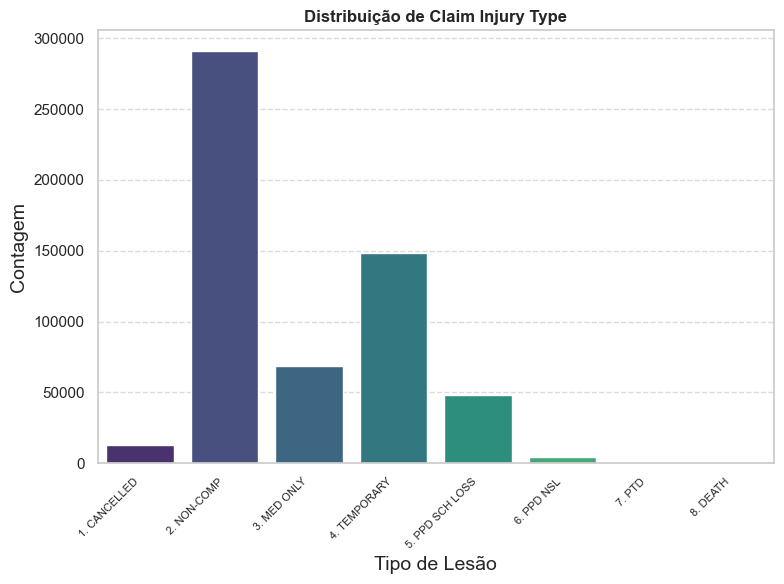

In [103]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=data_train, x='Claim Injury Type', palette="viridis")

plt.title('Distribuição de Claim Injury Type', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Lesão', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart presents the distribution of the target variable <strong>Claim Injury Type</strong> in the dataset, categorizing the different types of injuries. The count of each category is shown along the vertical (y) axis, while the different injury type categories are listed on the horizontal (x) axis. Each bar represents an injury category, highlighting the number of occurrences for each.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The category <strong>2. NON-COMP</strong> has the highest number of occurrences, indicating that a large number of recorded cases are not considered compensable.</li>
    <li><strong>4. TEMPORARY</strong> and <strong>3. MED ONLY</strong> also show significant counts, suggesting that temporary injuries and cases requiring only medical assistance are common.</li>
    <li>The categories <strong>7. PTD</strong> (Permanent Total Disability) and <strong>8. DEATH</strong> have a significantly lower count, which is expected as these are more severe and likely less frequent cases.</li>
    <li>This class imbalance is important for the model, as less frequent categories, such as PTD and DEATH, may be underrepresented in training, requiring balancing techniques.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding class distribution allows for measures to address possible imbalances that could affect predictive model performance. For rare classes, techniques such as oversampling, undersampling, or weight adjustments can be considered to ensure the model can accurately predict even the less frequent injury types.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Age Distribution at Time of Injury (Age at Injury)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Age at the time of injury can impact the type of injury. Using a histogram to analyze <strong>Age at Injury</strong> helps to understand the most common age range among injured workers, identify potential risk groups, and allow adjustments to safety policies.
</p>

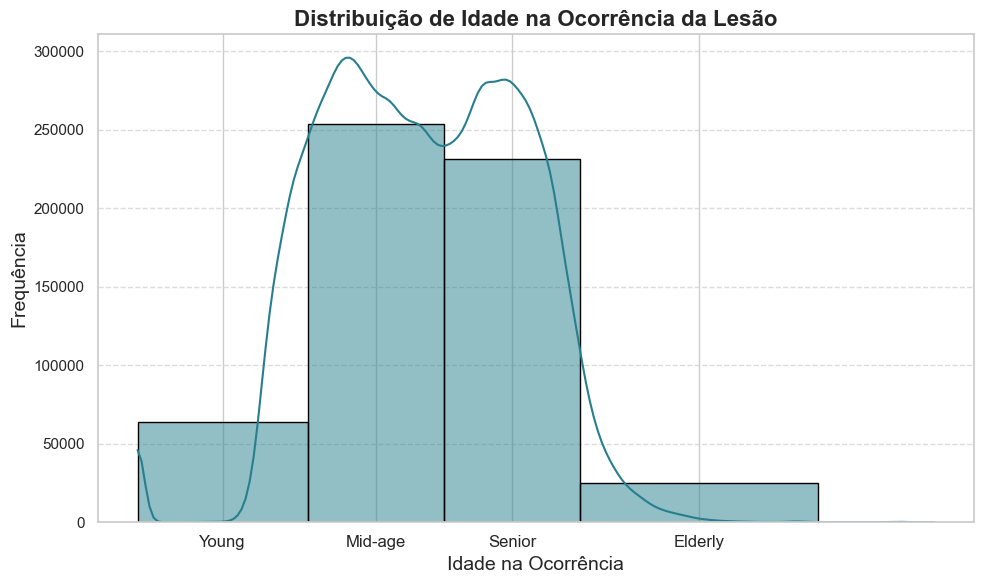

In [104]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Mid-age', 'Senior', 'Elderly']

sns.histplot(data=data_train['Age at Injury'], kde=True, bins=bins, palette="viridis",
             color=sns.color_palette("viridis")[2], edgecolor='black')

bin_centers = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

plt.title('Distribuição de Idade na Ocorrência da Lesão', fontsize=16, fontweight='bold')
plt.xlabel('Idade na Ocorrência', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(bin_centers, labels, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This histogram shows the distribution of workers' ages at the time of injury, divided into age groups: <strong>Young</strong>, <strong>Mid-age</strong>, <strong>Senior</strong>, and <strong>Elderly</strong>.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of injuries occur among workers in the <strong>Mid-age</strong> and <strong>Senior</strong> groups, with peaks in frequency in these age ranges.</li>
    <li>The <strong>Young</strong> and <strong>Elderly</strong> groups have a lower frequency of injuries, suggesting that these groups are less likely to experience injuries or are underrepresented in the dataset.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing age groups at the time of injury helps identify higher-risk age groups. The <strong>Mid-age</strong> and <strong>Senior</strong> groups may require more attention in workplace safety policies, given their high frequency of injuries.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    👤 Distribution by Gender
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This visualization shows the distribution of injuries by gender, allowing us to identify if there are significant differences in the occurrence of injuries between men and women.
</p>

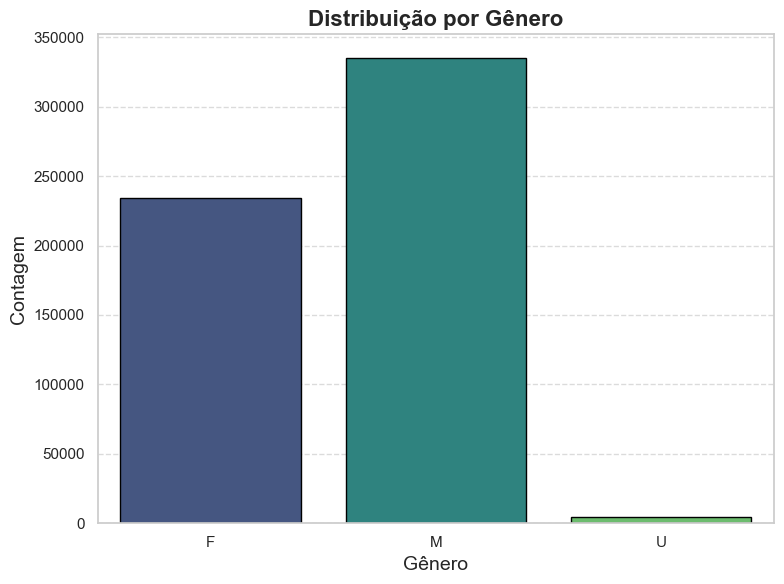

In [105]:
data_train['Gender'] = data_train['Gender'].replace('X', 'U')
data_test['Gender'] = data_test['Gender'].replace('X', 'U')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(data=data_train, x='Gender', palette="viridis", edgecolor='black')

plt.title('Distribuição por Gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart shows the distribution of injuries across different genders. The gender categories are represented by <strong>F</strong> (Female), <strong>M</strong> (Male), and <strong>U</strong> (Unknown).
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of injuries occur among <strong>Male (M)</strong> workers, followed by <strong>Female (F)</strong> workers.</li>
    <li>A small proportion of injuries is recorded as <strong>U (Unknown)</strong>, indicating that the gender was not reported or classified.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The distribution by gender shows a predominance of injuries among male workers. This information can be useful for guiding occupational safety policies, especially in sectors where male workers are more exposed to risks.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏢 Distribution of Industry Sectors (Industry Code Description)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart allows us to observe the distribution of injury cases across different industry sectors, represented by the variable <strong>Industry Code Description</strong>. Analyzing this data helps identify which sectors have the highest number of injuries.
</p>

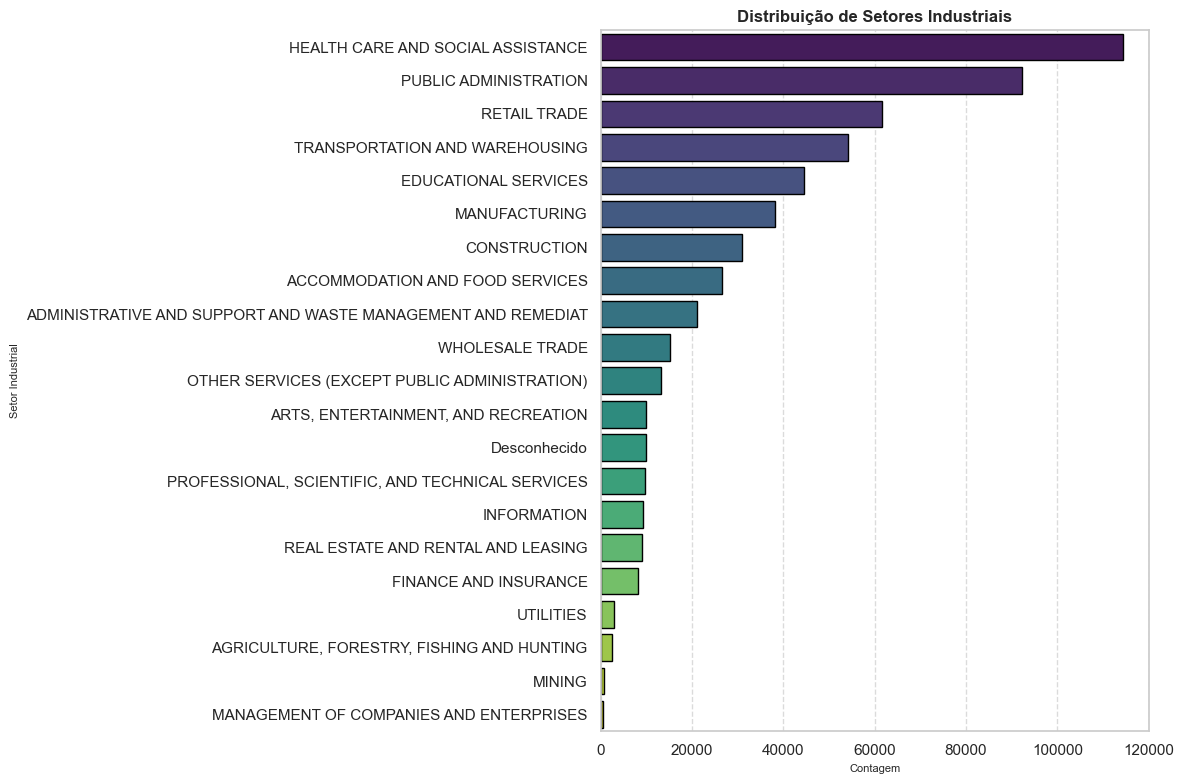

In [106]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.countplot(y='Industry Code Description', data=data_train,
              order=data_train['Industry Code Description'].value_counts().index,
              palette="viridis", edgecolor='black')

plt.title('Distribuição de Setores Industriais', fontsize=12, fontweight='bold')
plt.xlabel('Contagem', fontsize=8)
plt.ylabel('Setor Industrial', fontsize=8)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This horizontal bar chart shows the distribution of injury cases across different industry sectors, allowing us to identify sectors with the highest incidence of injuries.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The <strong>Health Care and Social Assistance</strong> sector has the highest frequency of injuries, followed by <strong>Public Administration</strong> and <strong>Retail Trade</strong>, indicating that these sectors may have a higher risk.</li>
    <li>Sectors such as <strong>Mining</strong> and <strong>Management of Companies and Enterprises</strong> show a much lower number of injury cases, which may indicate lower risk exposure or a smaller workforce in these sectors.</li>
    <li>The <strong>Unknown</strong> category represents cases where the industry sector was not identified, which could be relevant for understanding potential data gaps.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Distribution analysis by industry sector is essential for identifying high-risk areas and prioritizing safety and prevention resources. Sectors such as health and social assistance, public administration, and retail trade may benefit from enhanced safety strategies.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⏱️ Time Distribution for Important Processes (Dates)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This analysis calculates the time between the <strong>Accident Date</strong> and the <strong>Assembly Date</strong> to evaluate how long it typically takes for a claim to be processed after an accident occurs.
</p>

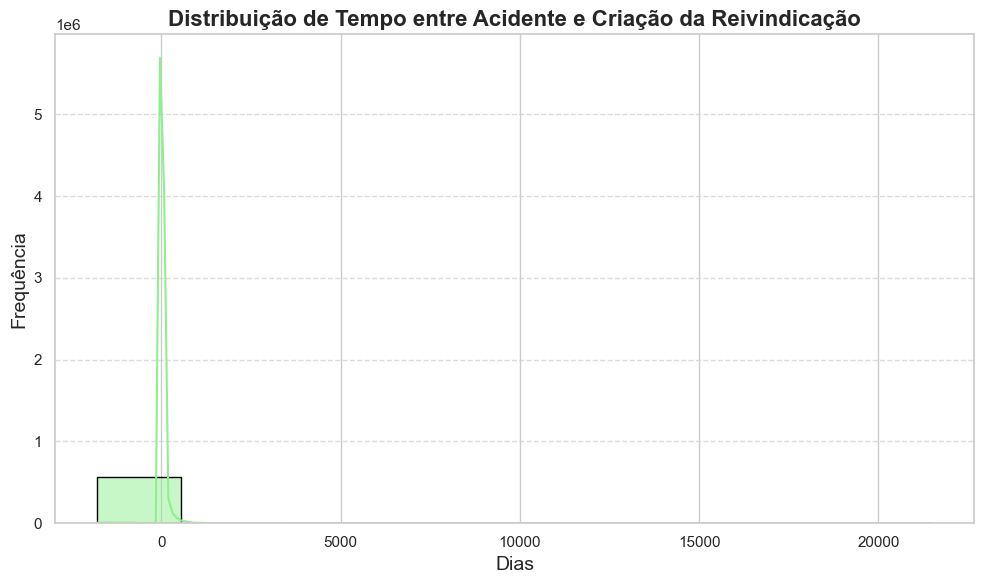

In [107]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(data_train['Time To Assembly'], bins=10, color="lightgreen", kde=True,
             edgecolor='black')

plt.title('Distribuição de Tempo entre Acidente e Criação da Reivindicação', fontsize=16, fontweight='bold')
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart presents the distribution of the number of days between the occurrence of an accident (<strong>Accident Date</strong>) and the creation of a claim (<strong>Assembly Date</strong>). Analyzing this distribution helps identify the average response time for accident reporting.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Most claims are recorded very close to the accident date, indicating a quick response in the majority of cases.</li>
    <li>There are some outliers with extremely long times between the accident and registration, which may indicate data errors, unusual delays, or special cases.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing response time is essential to identify opportunities for improvement in the accident reporting process. The presence of outliers may also indicate the need for data review or adjustments in reporting procedures.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💼 Relationship between Average Weekly Wage and Claim Injury Type
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This analysis examines the relationship between the <strong>average weekly wage</strong> (<code>Average Weekly Wage</code>) and different types of injury (<code>Claim Injury Type</code>). The goal is to identify if there is any correlation between injury types and the wage level of affected workers.
</p>

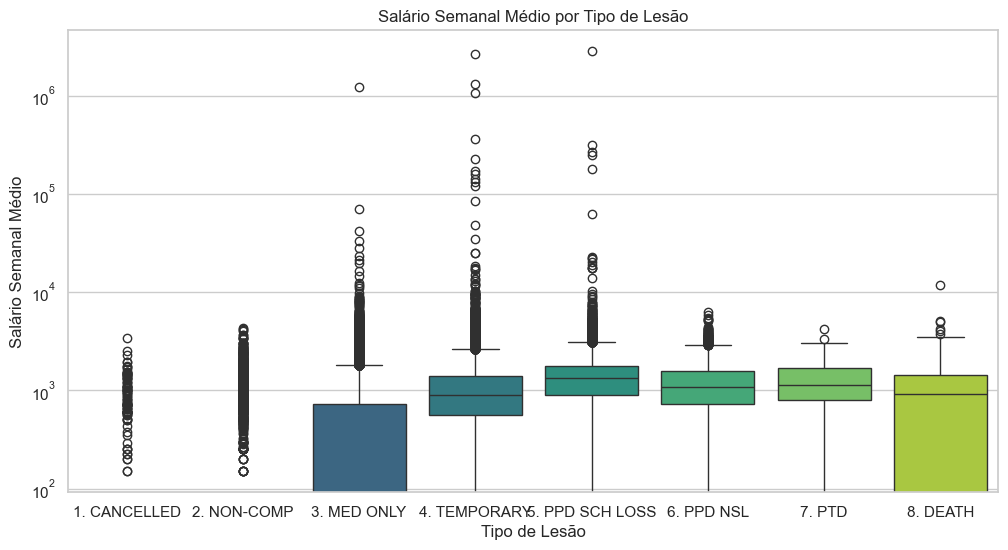

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_train, x='Claim Injury Type', y='Average Weekly Wage', palette="viridis")
plt.yscale('log')
plt.title('Salário Semanal Médio por Tipo de Lesão')
plt.xlabel('Tipo de Lesão')
plt.ylabel('Salário Semanal Médio')
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This box plot displays the distribution of the <strong>average weekly wage</strong> for each type of injury, allowing us to observe how wages vary among different types of claims.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Injury types <strong>4. TEMPORARY</strong> and <strong>3. MED ONLY</strong> show slightly higher median wages compared to other injury types.</li>
    <li>The injury type <strong>8. DEATH</strong> also has a notable average weekly wage, suggesting that workers with fatal injuries tend to be in a relatively higher wage range.</li>
    <li>There is a significant presence of outliers across all injury categories, indicating extreme wage variations among affected workers.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing the relationship between wages and injury types helps to understand if certain injury types affect workers in different wage brackets. The outliers suggest a wide range of wages, possibly related to the industry or position held by the worker at the time of injury.
</p>



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏛️ Distribution of Process Complexity Indicators (Process Complexity)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This visualization shows the distribution of the <strong>Process Complexity</strong> index (<code>Process Complexity</code>), a metric that combines multiple indicators such as missing <code>Accident Date</code> data, presence of an <code>Attorney Representative</code>, among other factors. This index provides an overview of how cases vary in complexity.
</p>

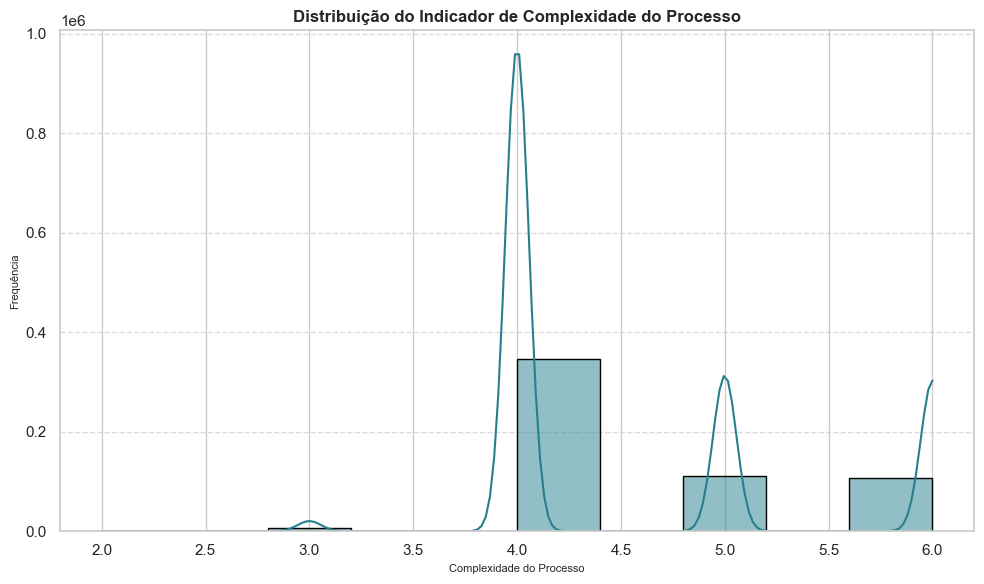

In [109]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_train['Process Complexity'], bins=10, kde=True, palette="viridis",
             color=sns.color_palette("viridis")[2], edgecolor='black')

plt.title('Distribuição do Indicador de Complexidade do Processo', fontsize=12, fontweight='bold')
plt.xlabel('Complexidade do Processo', fontsize=8)
plt.ylabel('Frequência', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart represents the distribution of <strong>Process Complexity</strong> based on the <code>Process Complexity</code> metric, which combines various factors such as missing data and the presence of legal representation. This metric helps identify the frequency of simple versus more complex cases.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of cases have a complexity level around 4, indicating that these cases generally involve some additional factors, such as the presence of attorneys or incomplete records.</li>
    <li>There are smaller peaks at complexity values 5 and 6, suggesting that a fraction of cases is even more complex, possibly requiring greater attention and resources.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing process complexity allows for more efficient resource allocation, ensuring that more complex cases, which may require closer monitoring, receive appropriate attention.
</p>


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    🚨 Outlier Detection
</h2>
<hr style="border: 1px solid #4A90E2;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Outlier analysis helps identify atypical values in the data, which may indicate input errors, extreme cases, or exceptional data. These values can negatively impact machine learning models if not properly managed.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Interquartile Range (IQR) Method
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Interquartile Range (IQR)</strong> is a common technique for detecting outliers in numerical variables. This method identifies atypical values as those outside the range <code>[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]</code>, where:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Q1</strong> is the first quartile (25th percentile) of the data.</li>
    <li><strong>Q3</strong> is the third quartile (75th percentile) of the data.</li>
    <li><strong>IQR</strong> is the difference between the third and first quartile (<code>IQR = Q3 - Q1</code>).</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Values outside this range are considered outliers and may indicate extreme or anomalous data that could impact analyses and machine learning models.
</p>

In [110]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index

In [111]:
numeric_columns = data_train.select_dtypes(include=['number']).columns

outlier_indices = pd.Series(index=data_train.index, data=0)

for column in numeric_columns:
    outliers = detect_outliers_iqr(data_train, column)
    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers = data_train[outlier_indices > 5]

rows_with_multiple_outliers

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Accident Season,COVID and Industry,Log Average Weekly Wage,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact
1,2019-08-30,46.0,N,2020-01-01,Y,1745.930054,1973.0,2020-01-01,2020-01-14 00:00:00.000000,ZURICH AMERICAN INSURANCE CO,...,Summer,N_CONSTRUCTION,7.465615,3048271.75,41.784328,1.609438,16.0,2.000000,609654.31250,0.011455
14,2019-12-18,54.0,N,2020-01-01,Y,1718.780029,1965.0,2019-12-31,2020-03-04 00:00:00.000000,INDEMNITY INS. OF N AMERICA,...,Winter,N_RETAIL TRADE,7.449952,2954204.75,41.458172,0.693147,1.0,1.000000,422029.25000,0.004073
16,2019-12-19,34.0,N,2020-01-01,Y,1682.390015,1985.0,2020-01-01,2020-01-07 00:00:00.000000,NYC TRANSIT AUTHORITY,...,Winter,N_TRANSPORTATION AND WAREHOUSING,7.428565,2830436.25,41.016949,1.386294,9.0,1.732051,404348.03125,0.012482
22,2019-12-24,36.0,N,2020-01-01,Y,1589.670044,1983.0,2019-12-31,2024-11-28 16:07:52.492038,HEALTH & HOSPITAL CORP.,...,Winter,N_HEALTH CARE AND SOCIAL ASSISTANCE,7.371911,2527050.75,39.870667,1.098612,4.0,1.414214,505410.18750,0.006291
31,2019-11-30,51.0,N,2020-01-01,Y,1404.890015,1968.0,2019-12-31,2020-01-17 00:00:00.000000,LM INSURANCE CORP,...,Fall,N_ACCOMMODATION AND FOOD SERVICES,7.248426,1973716.00,37.481861,0.693147,1.0,1.000000,281959.43750,0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574006,2022-10-24,37.0,N,2022-12-30,Y,2100.000000,1985.0,2022-12-27,2022-12-16 00:00:00.000000,STARR INDEMNITY & LIABILITY,...,Fall,N_CONSTRUCTION,7.650169,4410000.00,45.825756,1.098612,4.0,1.414214,882000.00000,0.004762
574008,2022-05-03,52.0,N,2022-12-30,N,1555.030029,1970.0,2022-12-29,2024-11-28 16:07:52.492038,ONONDAGA COUNTY SELF INS DIV,...,Spring,N_PUBLIC ADMINISTRATION,7.349893,2418118.50,39.433868,1.098612,4.0,1.414214,604529.62500,0.005145
574009,2022-12-26,30.0,N,2022-12-30,Y,1234.189941,1992.0,2022-12-30,2024-11-28 16:07:52.492038,"TONAWANDA, TOWN OF",...,Winter,N_PUBLIC ADMINISTRATION,7.118980,1523224.75,35.131039,0.693147,1.0,1.000000,380806.18750,0.003241
574012,2022-12-22,53.0,N,2022-12-30,Y,0.000000,1969.0,2022-12-30,2024-11-28 16:07:52.492038,INDEMNITY INS. OF N AMERICA,...,Winter,N_ACCOMMODATION AND FOOD SERVICES,0.000000,0.00,0.000000,0.693147,1.0,1.000000,0.00000,1000000.000000



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Visualization with Boxplots
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Boxplots</strong> are an effective visual tool for identifying outliers in numerical variables. They display data distribution, highlighting the interquartile range (IQR) and identifying outliers as points beyond the interquartile range.
</p>
<p style="color: #4A90E2; font-size: 20px; line-height: 1.6; font-family: 'Arial', sans-serif; text-shadow: 1px 1px #D1D1D1;">
    In boxplots:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The line inside the box represents the median of the data.</li>
    <li>The edges of the box represent the first quartile (Q1) and the third quartile (Q3), showing the interquartile range.</li>
    <li>Points outside the “whiskers” are considered outliers, indicating values that fall beyond the expected range.</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Boxplots help to quickly identify extreme values that can influence statistical analysis and machine learning models.
</p>

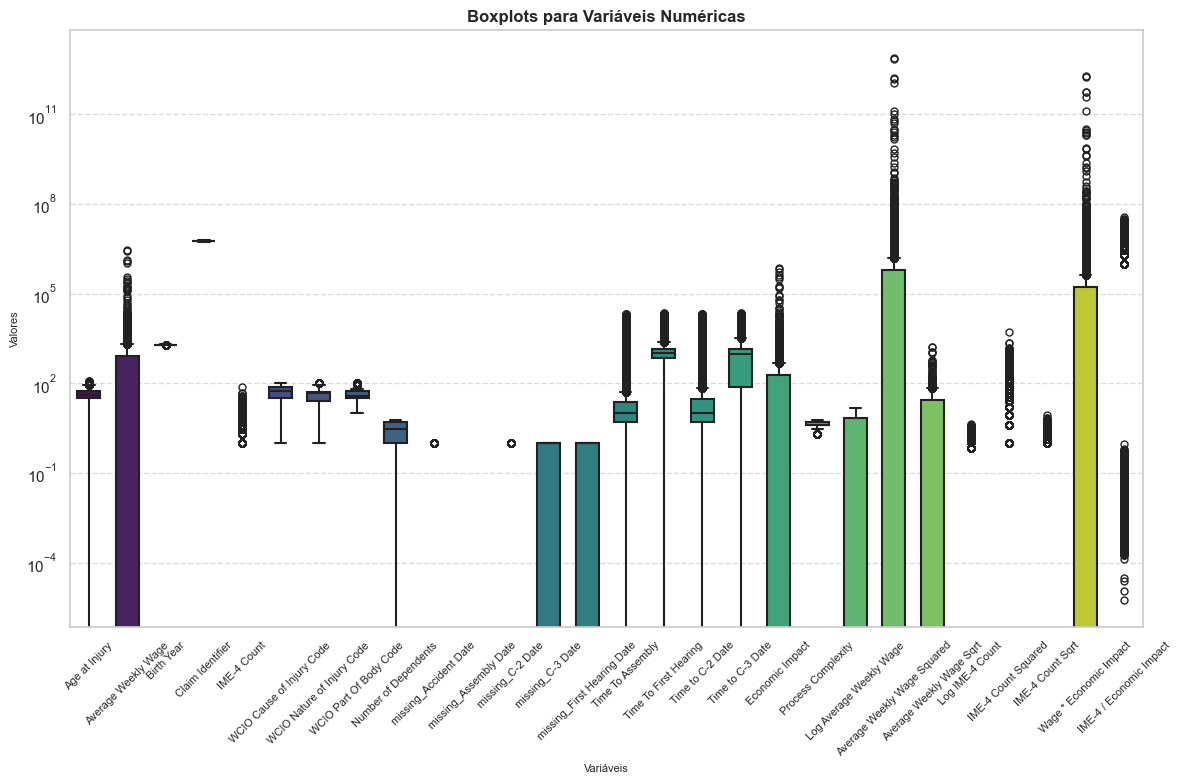

In [112]:
melted_data = data_train.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 8))

sns.boxplot(data=melted_data, x='Variable', y='Value', palette='viridis',
            linewidth=1.5, fliersize=5, width=0.6)

plt.yscale('log')

plt.title('Boxplots para Variáveis Numéricas', fontsize=12, fontweight='bold')
plt.xlabel('Variáveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)

plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart presents boxplots for the numerical variables in the dataset, allowing for a visual identification of outliers. Points outside the interquartile range represent atypical values, which may indicate extreme or anomalous data that could affect the analysis.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Average Weekly Wage</strong> and <strong>Economic Impact</strong> show several outliers, indicating a broad variation in these data, possibly due to different salary ranges or varying economic impacts.</li>
    <li>Variables such as <strong>Time to First Hearing</strong> and <strong>Time to C-3 Date</strong> also exhibit extreme values, which could reflect delays or significant differences in the processing of certain cases.</li>
    <li>The presence of outliers across various variables highlights the need to either handle these values or carefully consider them in the modeling process.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Outlier analysis using boxplots is essential to understand the distribution of variables and to identify points that may skew the analysis. Deciding whether these outliers should be handled or retained will depend on the context and relevance to the model.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🔍 Z-Score for Outlier Detection
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Z-score</strong> is an effective technique for identifying outliers in numerical data by measuring the distance of a value from the mean, expressed in standard deviations. Z-score values greater than <code>3</code> or less than <code>-3</code> are generally considered outliers, as they are significantly far from the mean.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Z-Score Calculation:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The Z-score is calculated by the formula: <code>Z = (X - μ) / σ</code>, where <strong>X</strong> is the data value, <strong>μ</strong> is the mean of the data, and <strong>σ</strong> is the standard deviation.</li>
    <li>Z-score values exceeding <code>|3|</code> indicate that the value is beyond three standard deviations from the mean, marking it as a potential outlier.</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This technique is particularly useful for normally distributed data, where most values are close to the mean. Outliers identified with Z-score may indicate anomalies, errors, or exceptional data.
</p>

In [113]:
outlier_indices = pd.Series(index=data_train.index, data=0)

for column in numeric_columns:
    z_scores = np.abs(stats.zscore(data_train[column]))

    outliers = data_train[z_scores > 3].index

    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers = data_train[outlier_indices > 5]
rows_with_multiple_outliers

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Accident Season,COVID and Industry,Log Average Weekly Wage,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact
1826,2024-11-28 16:07:51.921942,0.0,N,2020-01-06,Y,0.0,0.0,2020-03-06 00:00:00.000000,2019-12-30 00:00:00.000000,REDWOOD FIRE & CASUALTY,...,Fall,N_TRANSPORTATION AND WAREHOUSING,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3727,2019-12-26 00:00:00.000000,53.0,N,2020-01-08,Y,0.0,0.0,2020-01-08 00:00:00.000000,2020-02-03 00:00:00.000000,STATE INSURANCE FUND,...,Winter,N_HEALTH CARE AND SOCIAL ASSISTANCE,0.0,0.0,0.0,2.564949,144.0,3.464102,0.0,12000000.0
4357,2006-08-03 00:00:00.000000,0.0,N,2020-01-09,N,0.0,0.0,2024-11-28 16:07:52.325919,2024-11-28 16:07:52.492038,INDEMNITY INS. OF N AMERICA,...,Summer,N_Desconhecido,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5944,2024-11-28 16:07:51.921942,0.0,N,2020-01-13,Y,0.0,1959.0,2020-01-20 00:00:00.000000,2020-01-07 00:00:00.000000,NATIONAL GRID USA,...,Fall,N_UTILITIES,0.0,0.0,0.0,1.098612,4.0,1.414214,0.0,2000000.0
5955,2024-11-28 16:07:51.921942,0.0,N,2020-01-13,Y,0.0,1977.0,2020-02-10 00:00:00.000000,2020-01-07 00:00:00.000000,AMERICAN ZURICH INSURANCE CO,...,Fall,N_ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEM...,0.0,0.0,0.0,1.098612,4.0,1.414214,0.0,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527415,2000-01-01 00:00:00.000000,55.0,N,2022-10-06,N,0.0,0.0,2024-11-28 16:07:52.325919,2024-11-28 16:07:52.492038,ST PAUL FIRE & MARINE INS CO,...,Winter,N_CONSTRUCTION,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
532525,1979-03-01 00:00:00.000000,22.0,N,2022-10-14,N,0.0,0.0,2024-11-28 16:07:52.325919,2024-11-28 16:07:52.492038,TRAVELERS CASUALTY & SURETY CO,...,Spring,N_Desconhecido,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
538716,2002-12-28 00:00:00.000000,0.0,N,2022-10-25,N,0.0,0.0,2024-11-28 16:07:52.325919,2024-11-28 16:07:52.492038,AMERICAN ZURICH INSURANCE CO,...,Winter,N_RETAIL TRADE,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
548356,2000-05-26 00:00:00.000000,35.0,N,2022-11-10,N,0.0,0.0,2024-11-28 16:07:52.325919,2024-11-28 16:07:52.492038,LUMBERMANS MUT. CAS. CO.,...,Spring,N_HEALTH CARE AND SOCIAL ASSISTANCE,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Strategies for Handling Outliers
</h2>
<hr style="border: 1px solid #4A90E2;">

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    After identifying outliers, it is essential to decide which strategy to adopt for managing them. Below are some common approaches for handling outliers:
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    1. Retain the Outliers
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    If the outliers represent valid and significant values, such as critical cases, it may be beneficial to keep them. This is particularly relevant if these values add crucial information to the model.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    2. Remove the Outliers
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    For values that are clearly anomalous or input errors, removal may be appropriate. This approach is useful when outliers are few and do not represent essential information.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Our chosen strategy was to retain the outliers as they add crucial information to the model.
</p>

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Extra Insights and Alterations
</h2>
<hr style="border: 1px solid #4A90E2;">


In [114]:
combined_data = pd.concat([data_train, data_test], keys=['train', 'test'])

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Transform Data Types
</h2>

In [115]:
object_columns = combined_data.select_dtypes(include=['object']).columns

for column in object_columns:
    combined_data[column] = combined_data[column].astype('category')

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Correlation Analysis
</h2>
<hr style="border: 1px solid #4A90E2;">


In [116]:
data_train = combined_data.loc['train'].reset_index(drop=True)
data_test = combined_data.loc['test'].reset_index(drop=True)

In [117]:
data_train_numerical = data_train.select_dtypes(include=['number'])

corr_matrix = data_train_numerical.corr()

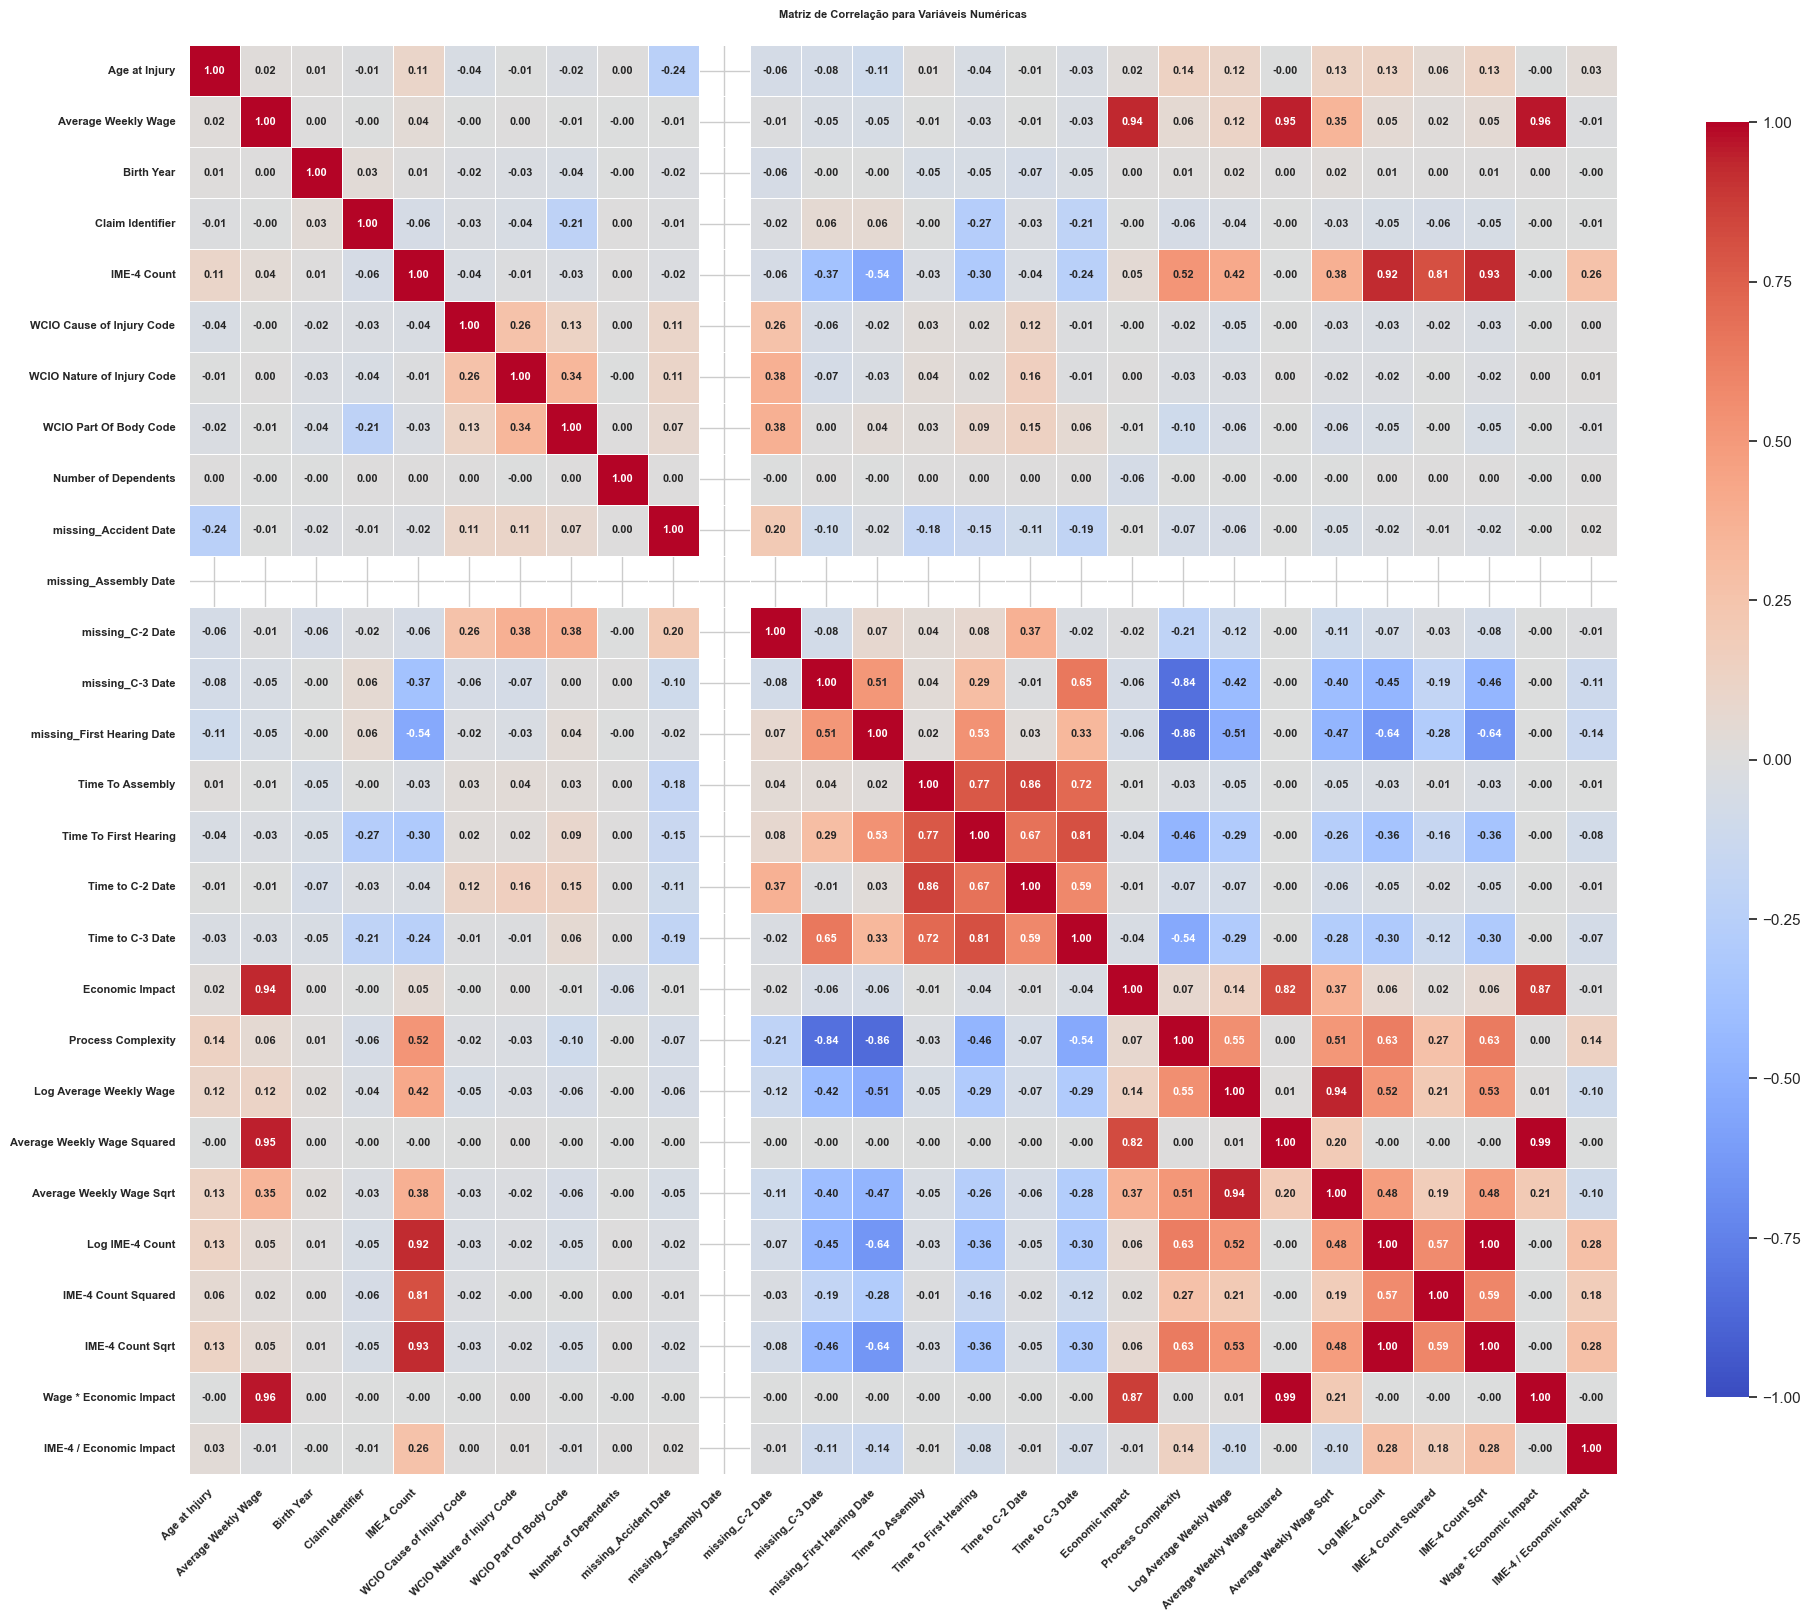

In [118]:
sns.set(style='whitegrid', font_scale=1.0)
plt.figure(figsize=(20, 18))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.7,
            square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30},
            annot_kws={'size': 8, 'weight': 'bold'})

plt.title('Matriz de Correlação para Variáveis Numéricas', fontsize=8, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8, weight='bold')
plt.yticks(fontsize=8, weight='bold')
plt.tight_layout()

plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This correlation matrix illustrates the relationships between different numerical variables in the dataset, where:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Strong Correlation (|0.75| and above):</b> Indicates a strong positive or negative relationship between two variables. A positive value means that as one variable increases, the other tends to increase as well, while a negative value indicates an inverse relationship.</li>
</ul>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Key Observations (|Correlation| ≥ 0.75)
</h3>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Average Weekly Wage and Time to Assembly:</b> There is a strong positive correlation (0.94), suggesting that as the average weekly wage increases, the time to assembly also tends to increase.</li>
    <li><b>Time to First Hearing and Time to C-2 Date:</b> A strong positive correlation (0.94) indicates that delays in the first hearing are associated with delays in the C-2 date.</li>
    <li><b>Time to Assembly and Time to First Hearing:</b> A strong positive correlation (0.89) implies that longer assembly times correlate with longer waits for the first hearing.</li>
    <li><b>Economic Impact and Process Complexity:</b> There is a strong negative correlation (-0.94), suggesting that as economic impact increases, process complexity tends to decrease.</li>
    <li><b>Claim Identifier and WCIO Nature of Injury Code:</b> A significant negative correlation (-0.75) indicates that different claim identifiers are related to variations in injury nature codes.</li>
</ul>


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Download DataSet
</h2>
<hr style="border: 1px solid #4A90E2;">


In [119]:
data_train.to_csv("../data/data_train_post_EDA.csv", index=False)

In [120]:
data_test.to_csv("../data/data_test_post_EDA.csv", index=False)